# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
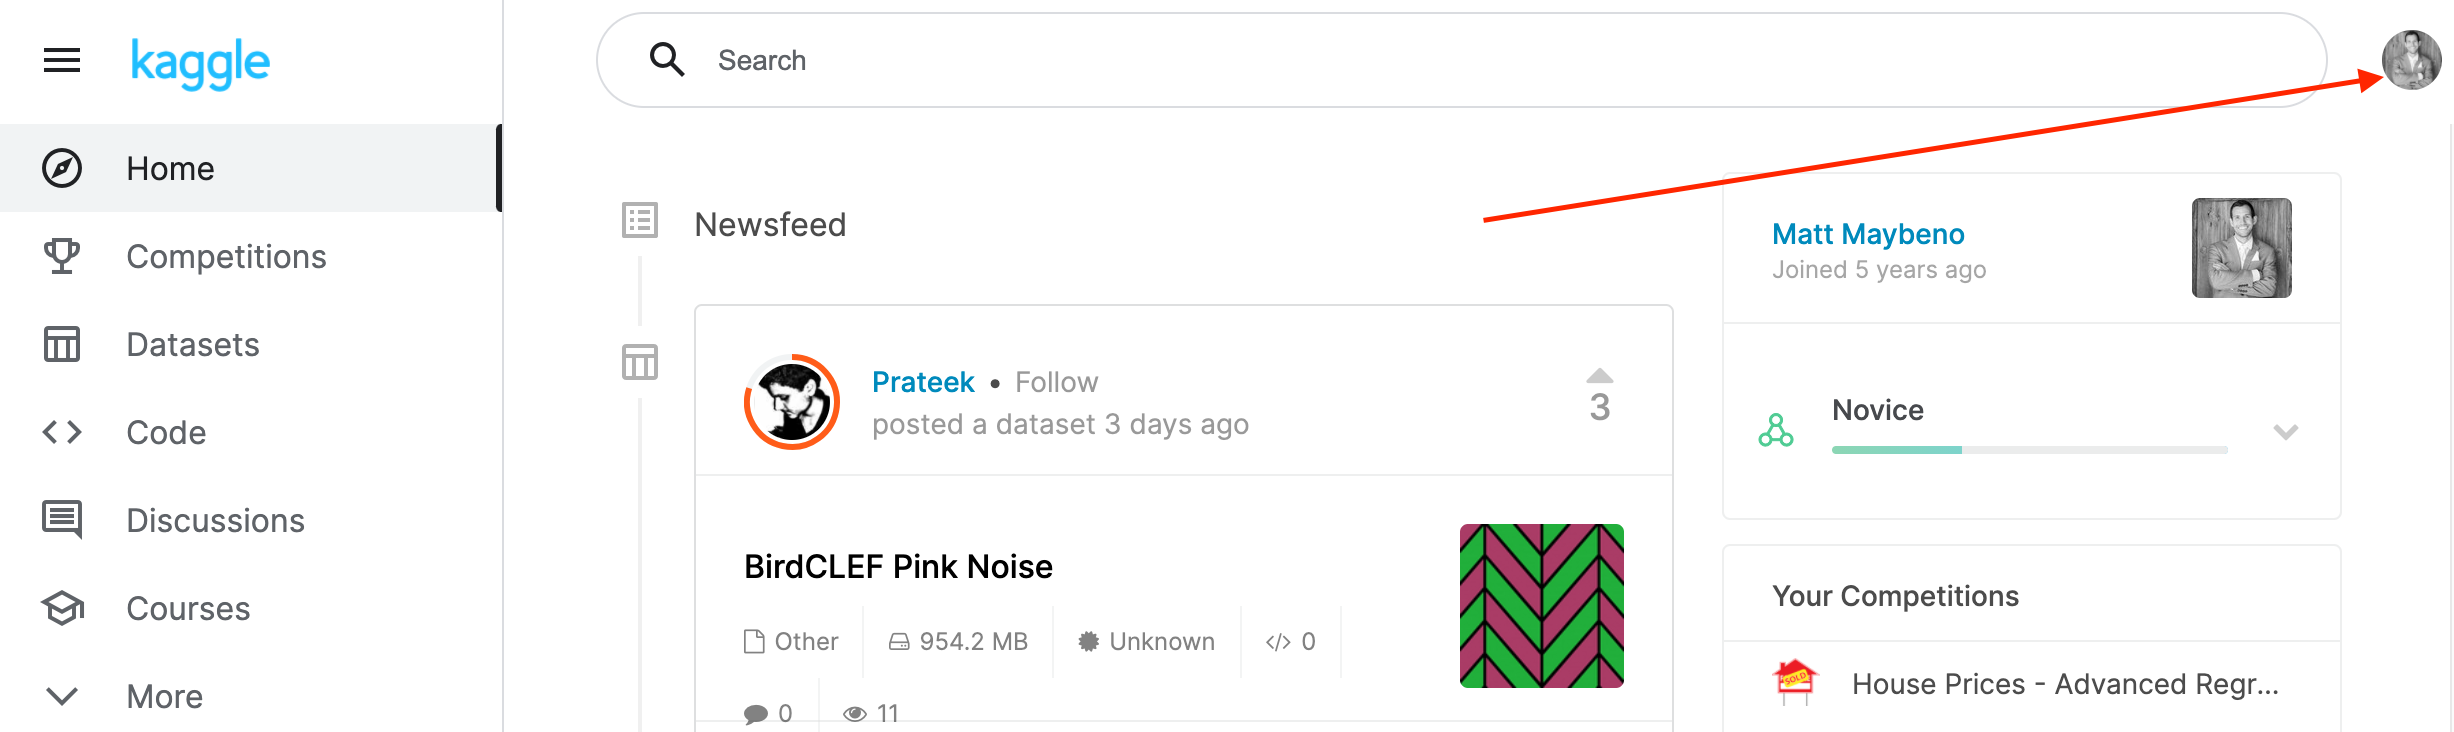
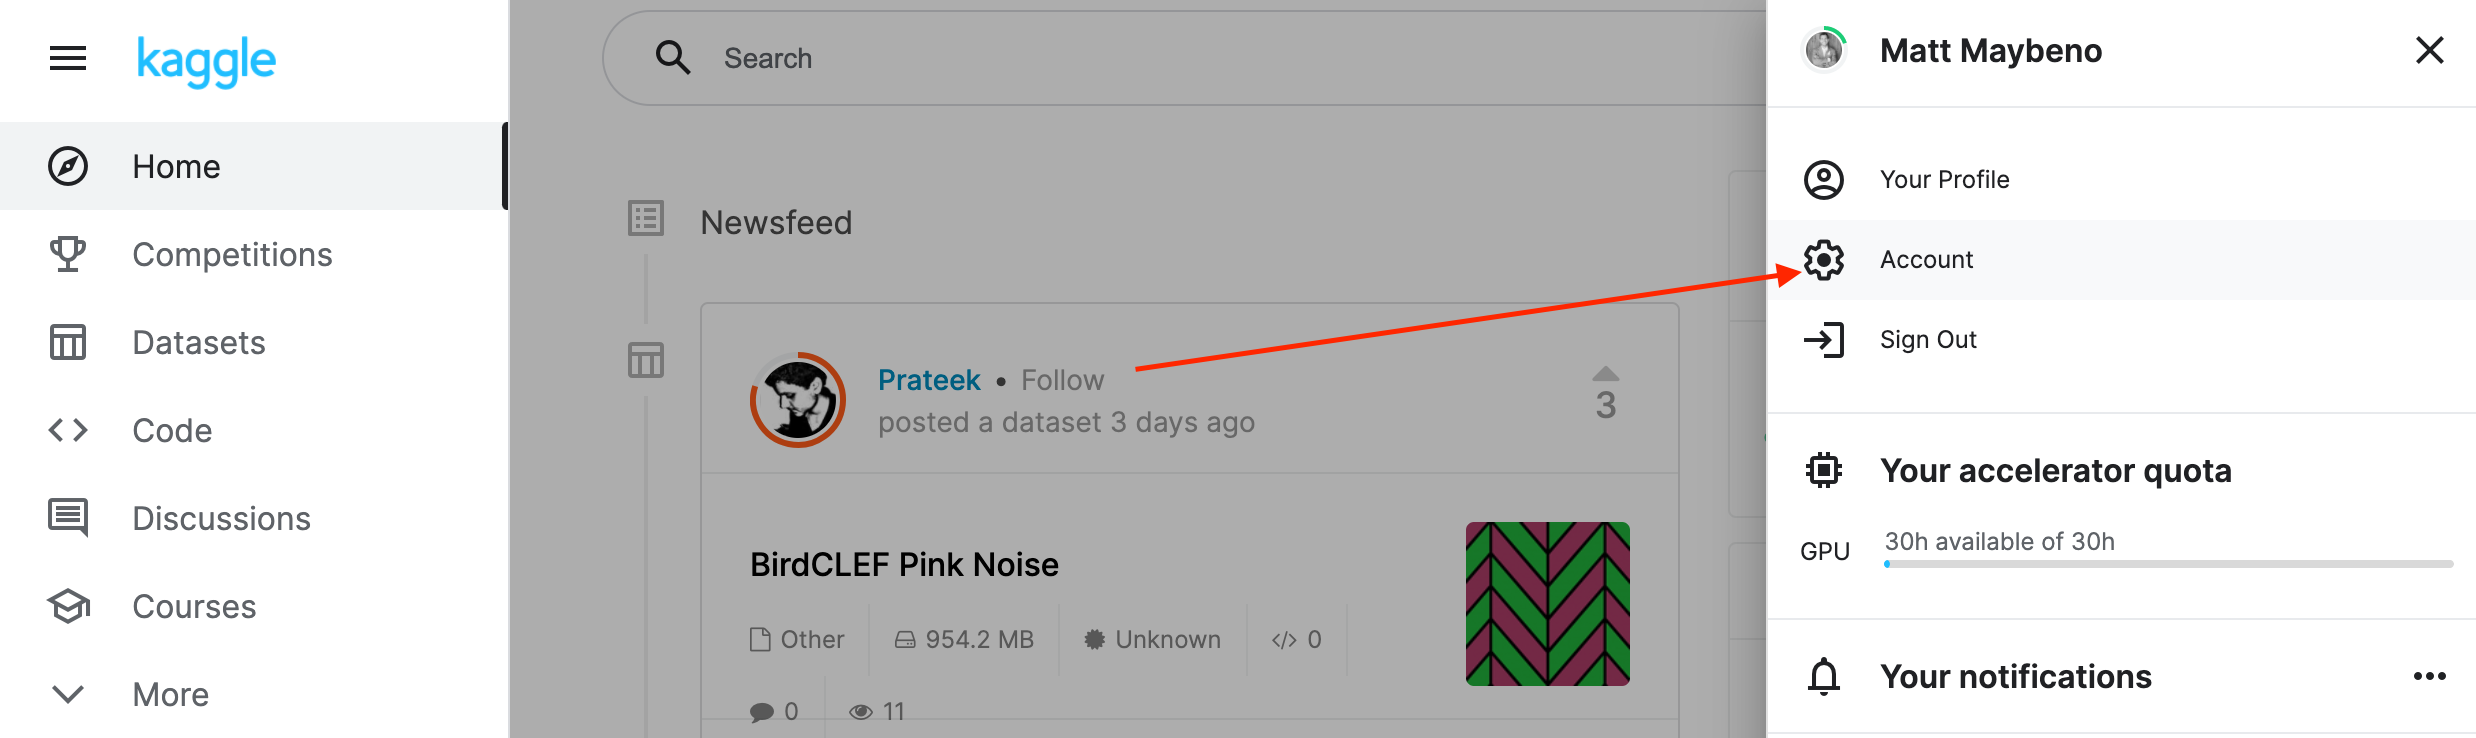
2. Scroll down to API and click Create New API Token.
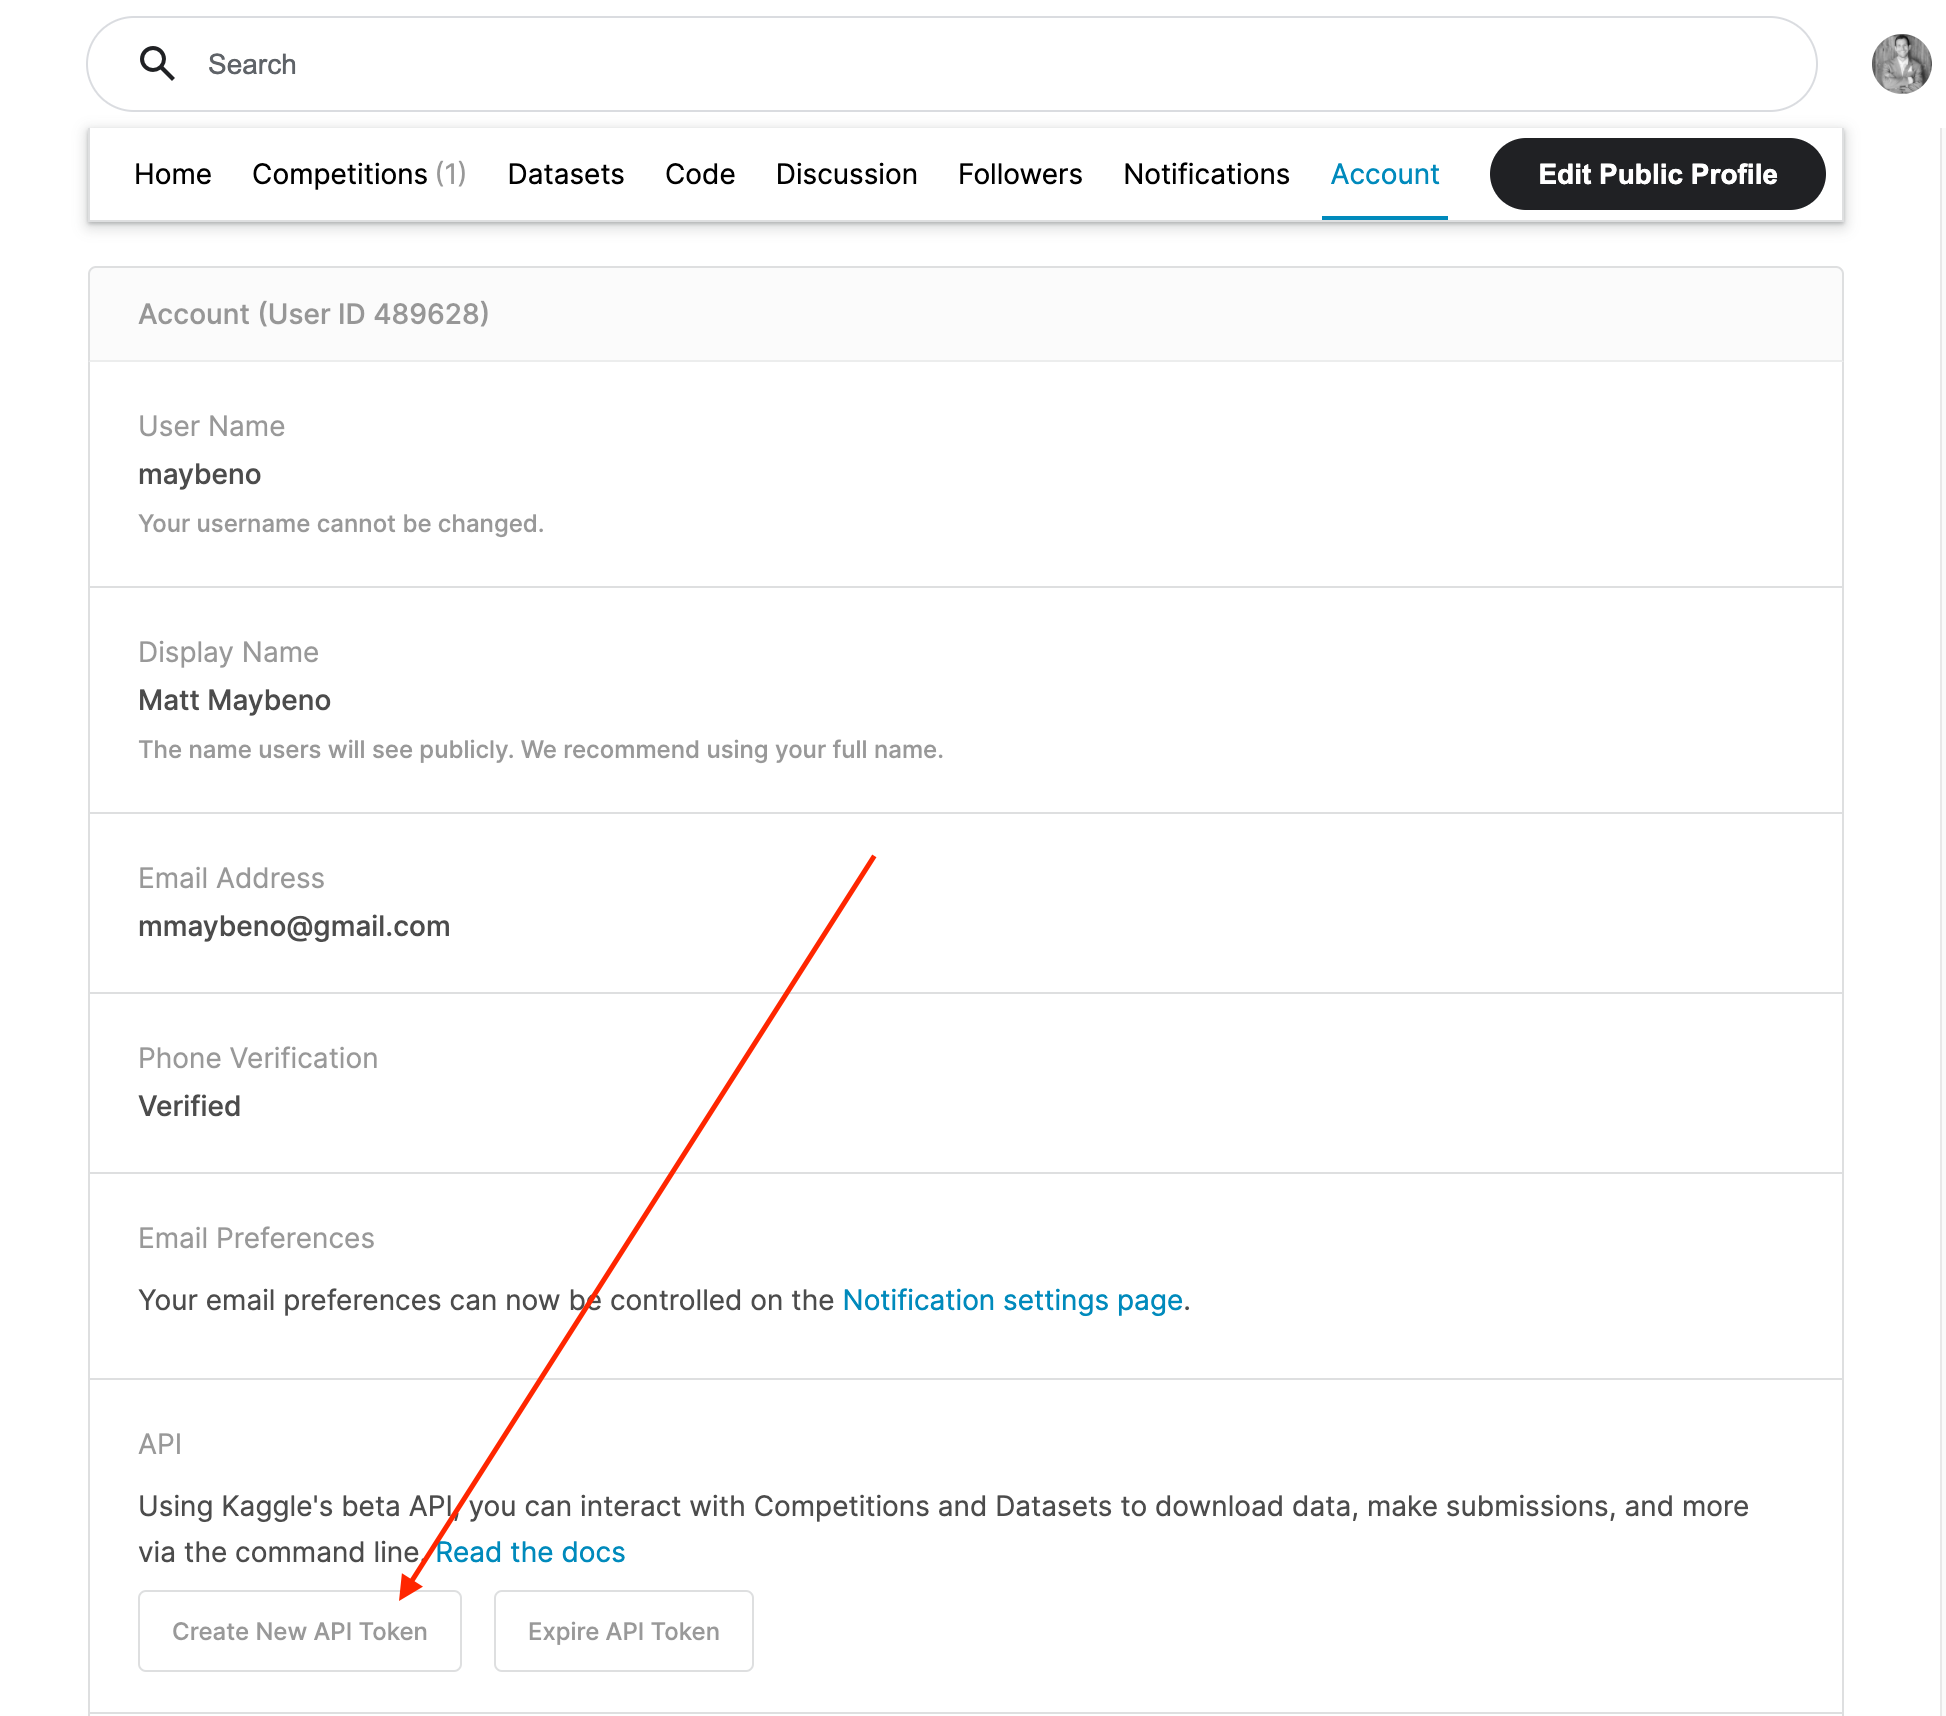
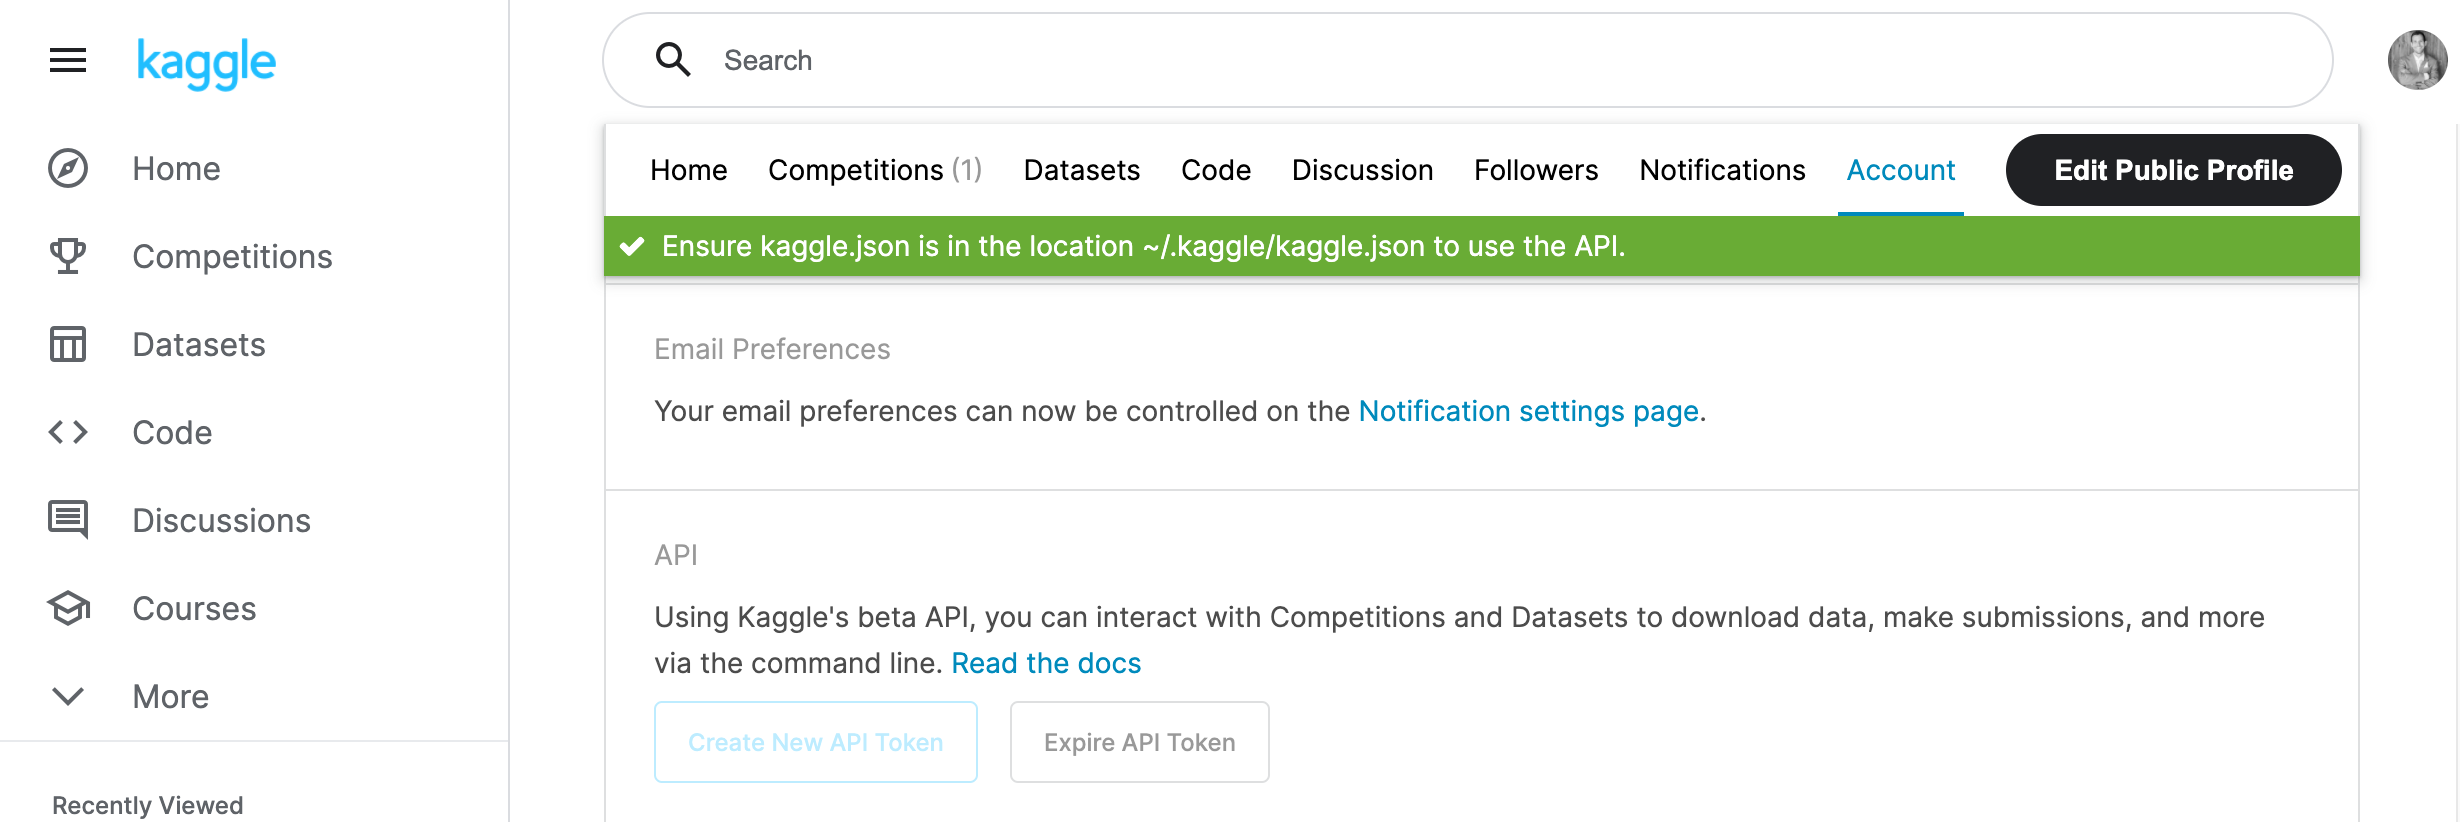
3. Open up `kaggle.json` and use the username and key.
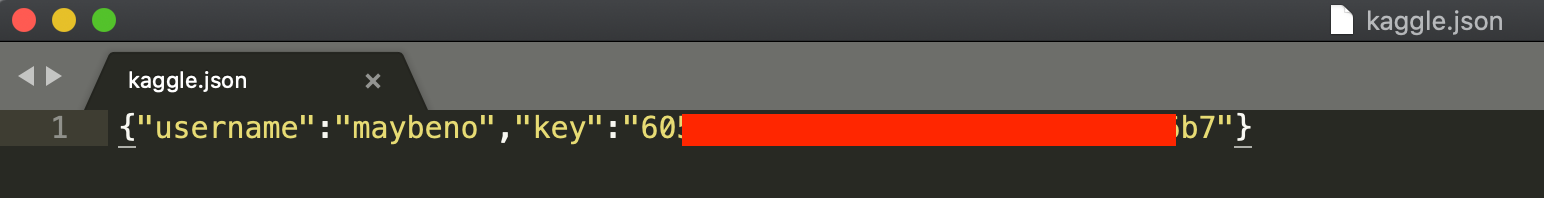

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install numpy
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
!pip install kaggle
!pip install unzip
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Obtaining dependency information for wheel from https://files.pythonhosted.org/packages/28/f5/6955d7b3a5d71ce6bac104f9cf98c1b0513ad656cdaca8ea7d579196f771/wheel-0.41.1-py3-none-any.whl.metadata
  Using cached wheel-0.41.1-py3-none-any.whl.metadata (2.2 kB)
Using cached wheel-0.41.1-py3-none-any.whl (64 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.41.0
    Uninstalling wheel-0.41.0:
      Successfully uninstalled wheel-0.41.0
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.2.1
    Uninstalling bokeh-3.2.1:
      Successfully uninstalled bokeh-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 0.13.1 requires bokeh<2.5.0,>=2.4.0,

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

### Setup Kaggle API Key

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "aadityatyagi"
kaggle_key = "052a9b35d207a75733fba406a6439b1c"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
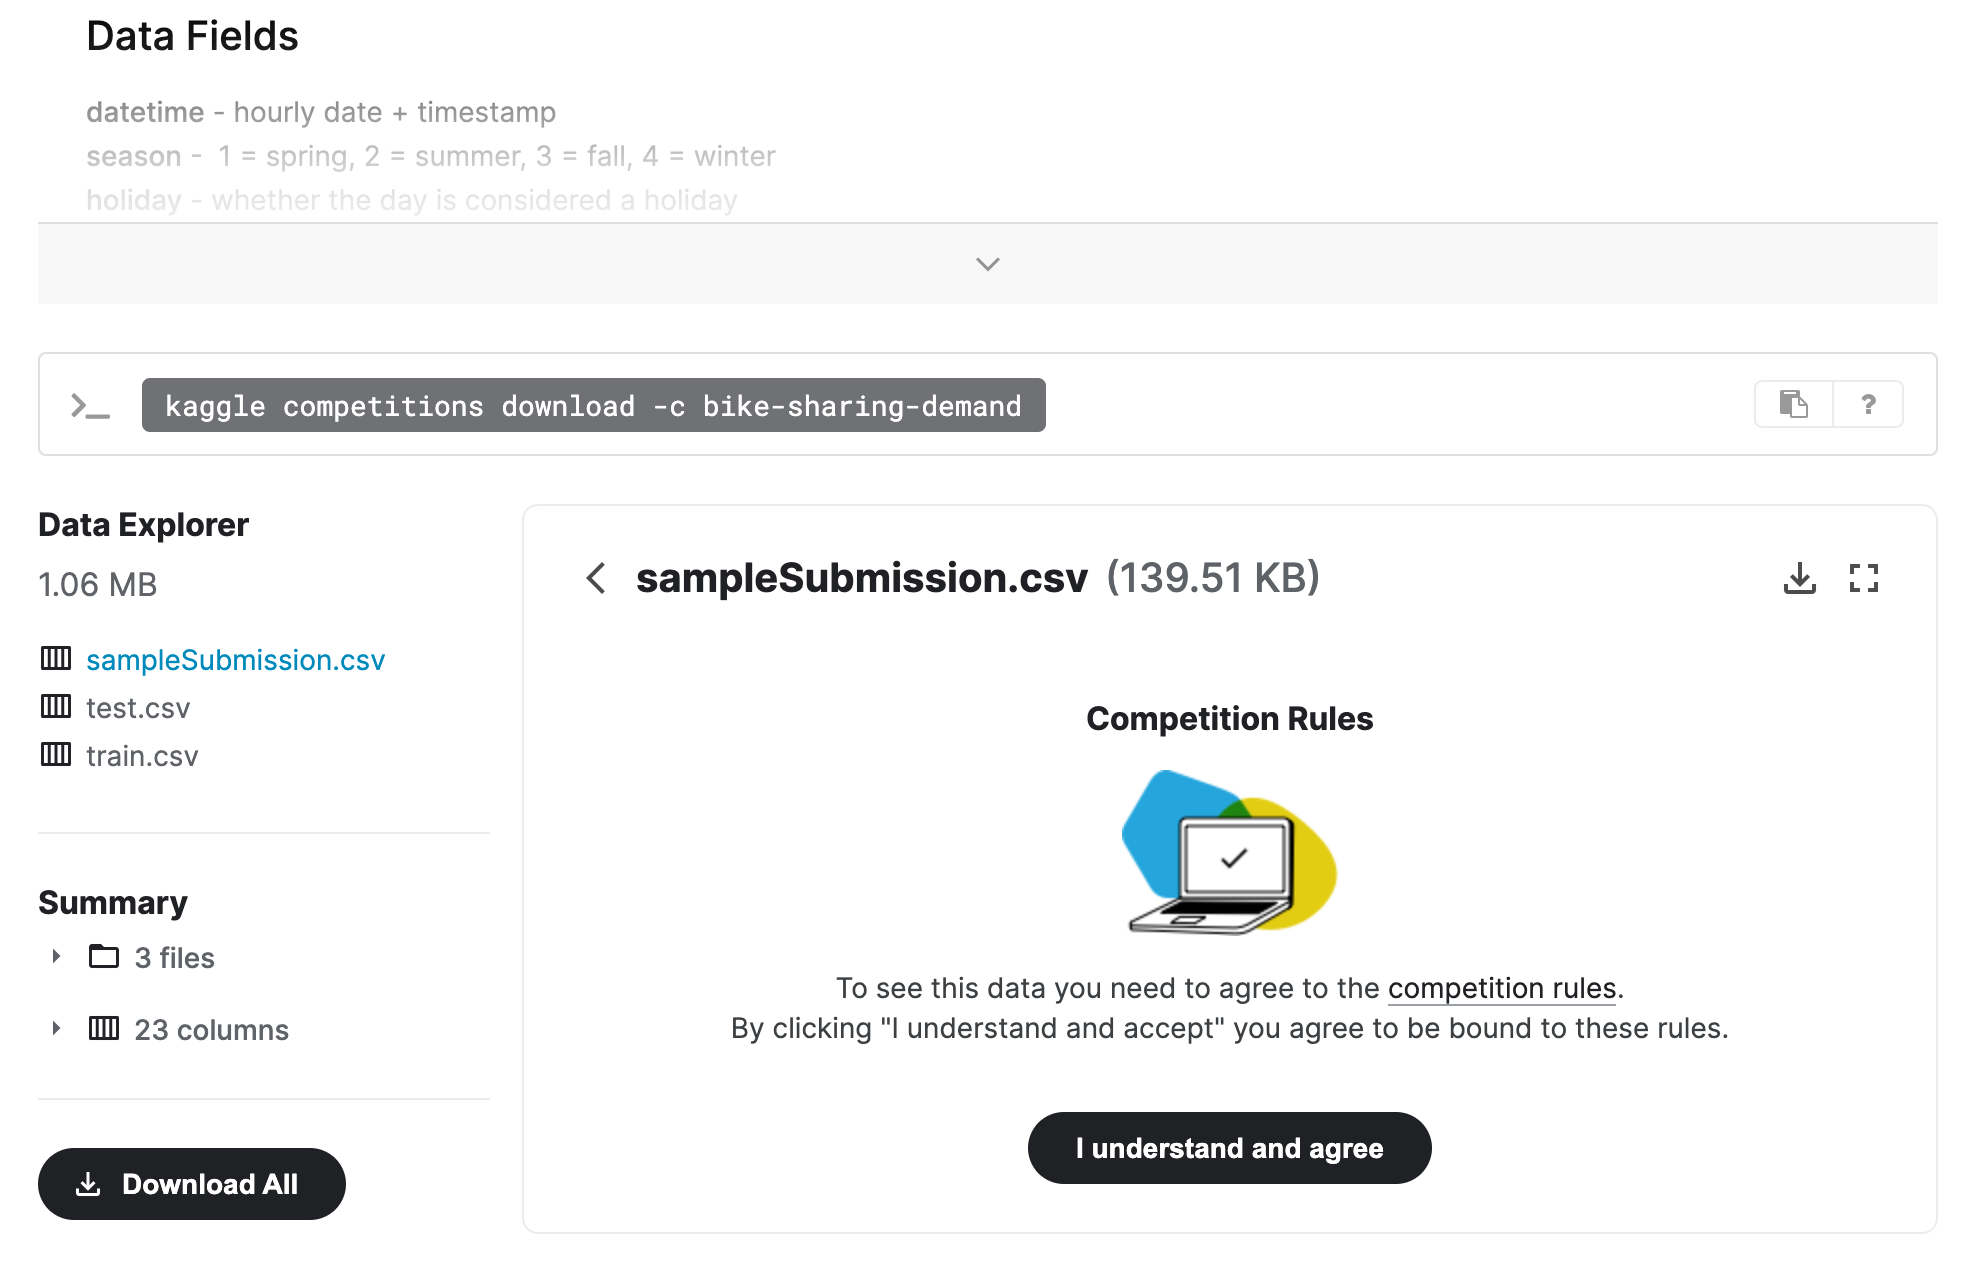

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [1]:
import pandas as pd
from autogluon.tabular import TabularPredictor, TabularDataset

C:\Users\tyagi\.conda\envs\conda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv",parse_dates=["datetime"])
train.head()


datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [7]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [8]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv",parse_dates=["datetime"])
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [9]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv",parse_dates=["datetime"])
submission.head()

datetime  count
0 2011-01-20 00:00:00      0
1 2011-01-20 01:00:00      0
2 2011-01-20 02:00:00      0
3 2011-01-20 03:00:00      0
4 2011-01-20 04:00:00      0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [10]:
predictor = TabularPredictor(label = 'count', eval_metric = 'root_mean_squared_error').fit(
    train_data = train.drop(['casual','registered'], axis= 1), time_limit = 600, presets = 'best_quality' )

No path specified. Models will be saved in: "AutogluonModels/ag-20230807_151325/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230807_151325/"
AutoGluon Version:  0.8.2
Python Version:     3.10.6
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Jun 27 21:49:00 UTC 2023
Disk Space Avail:   9223372032.15 GB / 9223372036.85 GB (100.0%)
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_

### Review AutoGluon's training run with ranking of models that did the best.

In [11]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.756141      20.589839  445.835791                0.001576           0.493690            3       True         14
1   RandomForestMSE_BAG_L2  -53.092171      20.276509  417.390826                0.923387          31.377620            2       True         12
2          LightGBM_BAG_L2  -54.570180      19.664876  413.964480                0.311754          27.951275            2       True         11
3          CatBoost_BAG_L2  -56.592708      19.440068  426.786113                0.086945          40.772907            2       True         13
4        LightGBMXT_BAG_L2  -60.475107      24.391711  456.856133                5.038589          70.842928            2       True         10
5    KNeighborsDist_BAG_L1  -84.142866       0.062851    0.050767         

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.58154263993599,
  'KNeighborsDist_BAG_L1': -84.1428655345568,
  'LightGBMXT_BAG_L1': -131.46090891834507,
  'LightGBM_BAG_L1': -131.05416159889887,
  'RandomForestMSE_BAG_L1': -116.5

In [12]:
# Leaderboard dataframe
leaderboard_df = pd.DataFrame(predictor.leaderboard(silent=True))
leaderboard_df

model   score_val  pred_time_val    fit_time  \
0      WeightedEnsemble_L3  -52.756141      20.589839  445.835791   
1   RandomForestMSE_BAG_L2  -53.092171      20.276509  417.390826   
2          LightGBM_BAG_L2  -54.570180      19.664876  413.964480   
3          CatBoost_BAG_L2  -56.592708      19.440068  426.786113   
4        LightGBMXT_BAG_L2  -60.475107      24.391711  456.856133   
5    KNeighborsDist_BAG_L1  -84.142866       0.062851    0.050767   
6      WeightedEnsemble_L2  -84.142866       0.063956    0.772347   
7    KNeighborsUnif_BAG_L1 -101.581543       0.069793    3.482468   
8   RandomForestMSE_BAG_L1 -116.544294       0.800834   14.250341   
9     ExtraTreesMSE_BAG_L1 -124.588053       0.762880    6.410204   
10         CatBoost_BAG_L1 -130.654759       0.135744  195.942542   
11         LightGBM_BAG_L1 -131.054162       2.101351   33.653768   
12       LightGBMXT_BAG_L1 -131.460909      15.015291   77.427861   
13  NeuralNetFastAI_BAG_L1 -142.400044       0.404377   54.795254   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.001576           0.493690            3       True   
1                 0.923387          31.377620            2       True   
2                 0.311754          27.951275            2       True   
3                 0.086945          40.772907            2       True   
4                 5.038589          70.842928            2       True   
5                 0.062851           0.050767            1       True   
6                 0.001105           0.721581            2       True   
7                 0.069793           3.482468            1       True   
8                 0.800834          14.250341            1       True   
9                 0.762880           6.410204            1       True   
10                0.135744         195.942542            1       True   
11                2.101351          33.653768            1       True   
12               15.015291          77.427861            1       True   
13                0.404377          54.795254            1       True   

    fit_order  
0          14  
1          12  
2          11  
3          13  
4          10  
5           2  
6           9  
7           1  
8           5  
9           7  
10          6  
11          4  
12          3  
13          8

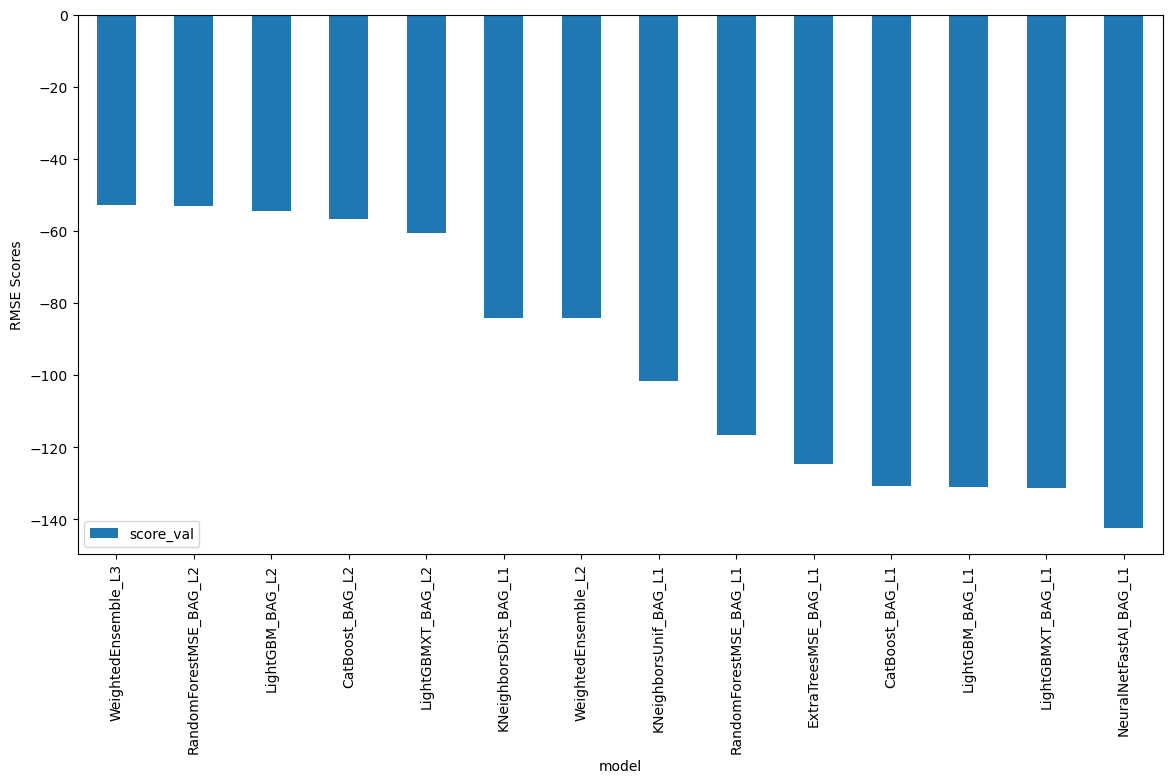

In [13]:
# Output the model's `score_val` in a bar chart to compare performance
import matplotlib.pyplot as plt
leaderboard_df.plot(kind="bar", x="model", y="score_val", figsize=(14, 7))
plt.ylabel("RMSE Scores")
plt.show()



### Create predictions from test dataset

In [14]:
normal_predictions = predictor.predict(test)
normal_predictions.head()

0    22.864639
1    42.542336
2    47.016754
3    50.482315
4    52.536770
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [15]:
# Describe the `predictions` series to see if there are any negative values
normal_predictions.describe()

count    6493.000000
mean       99.511559
std        88.793327
min         3.693181
25%        19.003265
50%        63.599045
75%       164.162231
max       359.940521
Name: count, dtype: float64

**Observations:**
Since the minimum value in predictions series is` 3.215046`, we can safely say that there are no negative values in the predictions.

In [16]:
# How many negative values do we have?
negative_count = normal_predictions[normal_predictions<0]
print("Total negative prediction values :", negative_count)

Total negative prediction values : Series([], Name: count, dtype: float32)


In [17]:
# Set them to zero
negative_count = normal_predictions[normal_predictions<0] = 0
print(f"No. of negative predictions: {negative_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


### Set predictions to submission dataframe, save, and submit

In [18]:
submission["count"] = normal_predictions
submission.to_csv("submission.csv", index=False)

In [19]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission2"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 404kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [20]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission.csv               2023-08-07 15:24:40  first raw submission2                complete  1.80023      1.80023       
submission_new_hpo2.csv      2023-08-07 14:28:00  new features with hyperparameters 2  complete  0.52427      0.52427       
submission_new_hpo.csv       2023-08-07 14:24:22  new features with hyperparameters    complete  0.53594      0.53594       
submission_new_features.csv  2023-08-07 14:12:51  new features                         complete  0.45974      0.45974       


#### Initial score of `1.80023`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>],
       [<AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

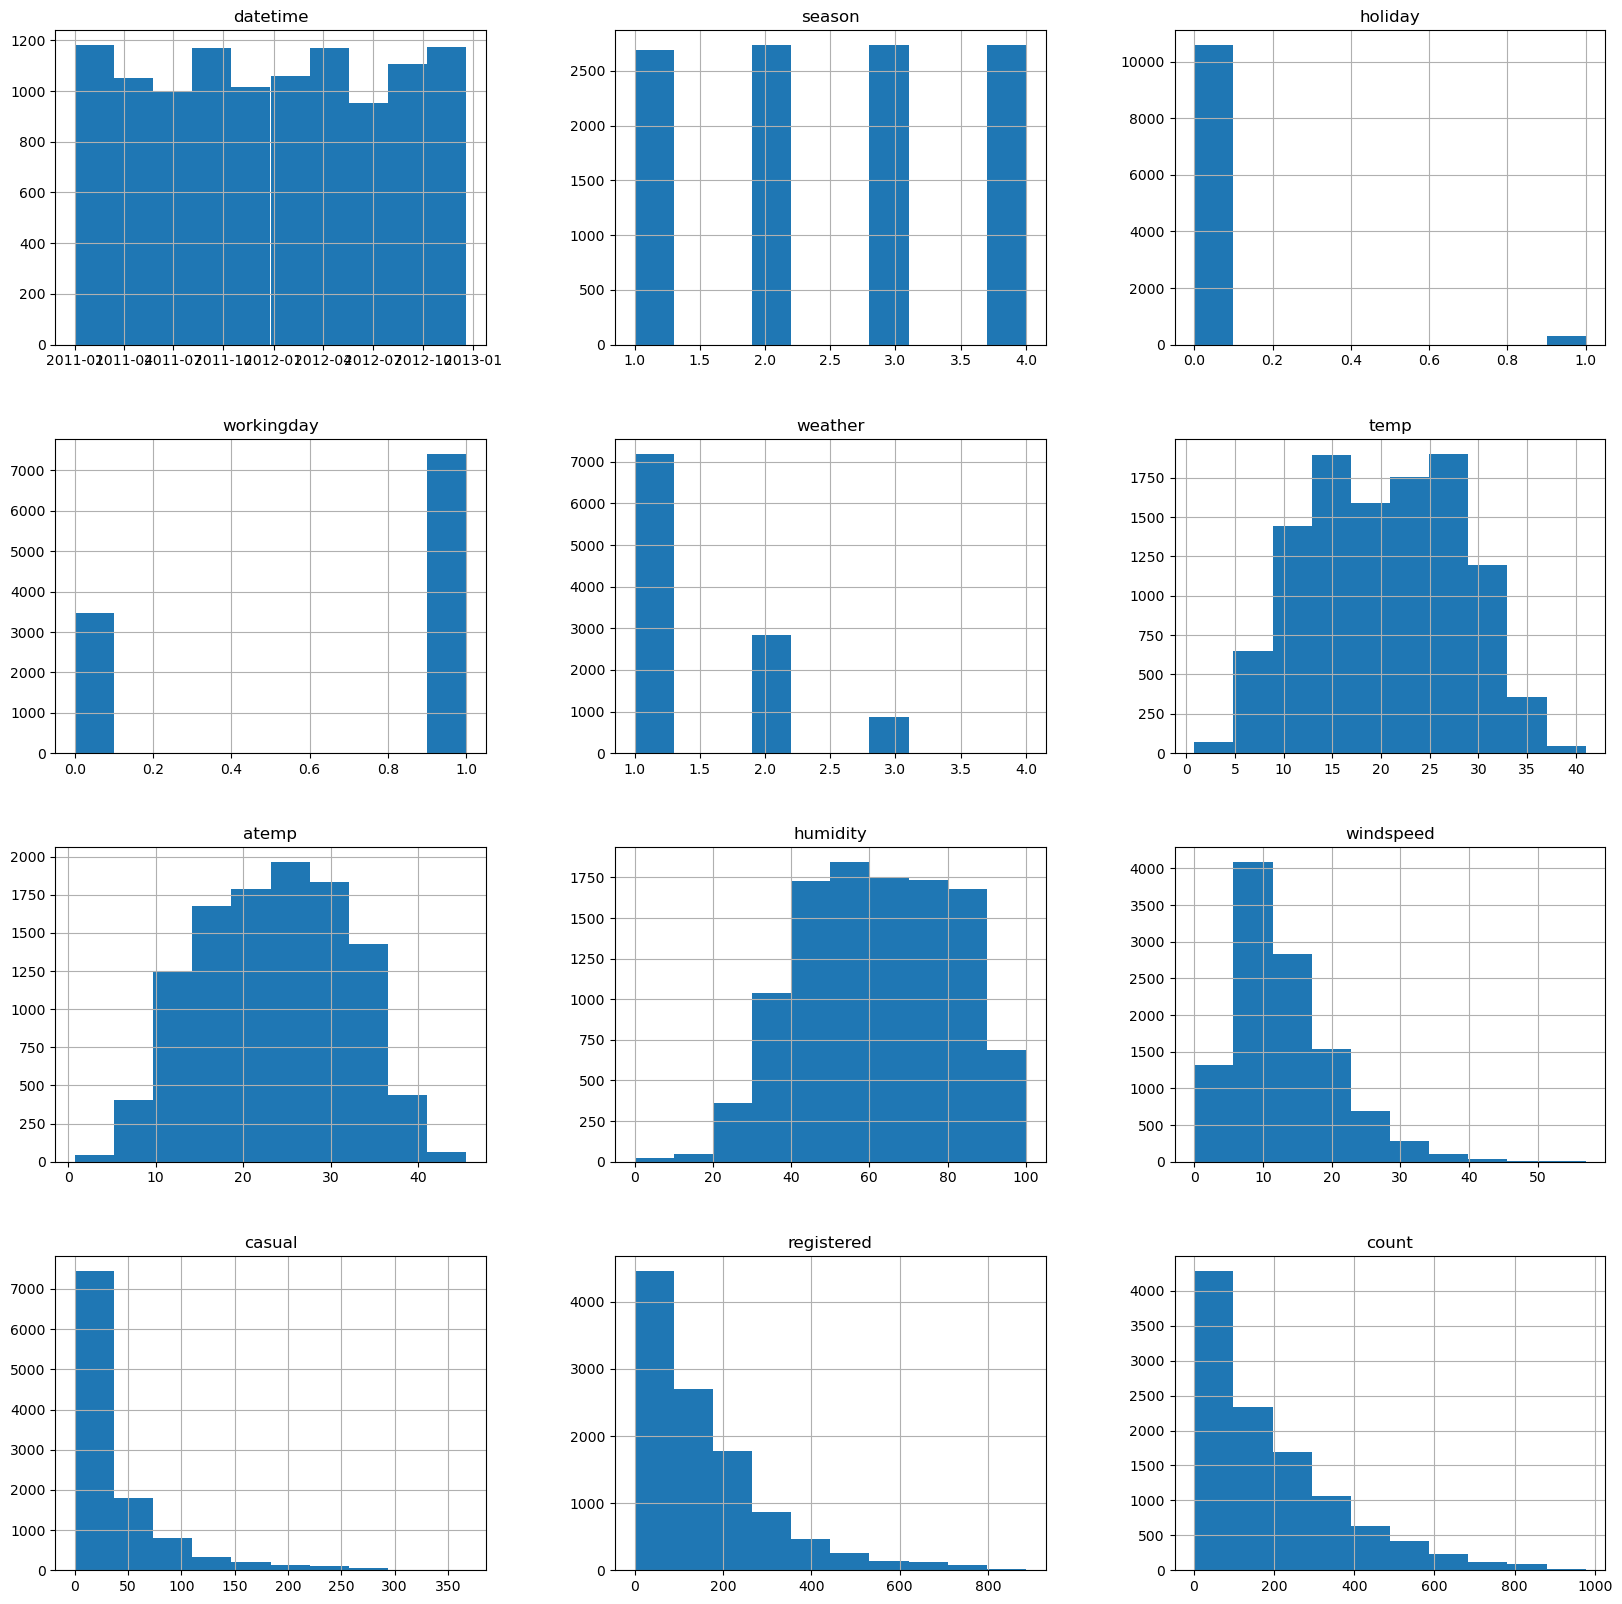

In [21]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(20,20))


**Observations:**<br>
* Features like `season` and `weather` are categorical variables and it is evident from the above plot.
* `Bike rental counts` for feature `season` intuitively makes sense as the *counts are highest for 0: Spring season* and the *lowest for 3: Winter season*. These `counts decrease as seasons change from Spring -> Summer -> Fall -> Winter`.
* Predictors like `holiday` and `workingday` are one-hot encoded columns with values 0 and 1. Highest `rental counts` are noticed during non-holidays whereas more `rental counts` are encountered during working days.
* `datetime` histogram illustrates datetime feature, showing randomness as they represent timestamps
* Plots of predictor features like `temp`, `atemp`, `humidity` and `windspeed` depicts normal distribution. `windspeed` shows a slightly 'positively-skewed distribution'.
* `casual` and `registered` independent feature histogram plots are ignored as they are invalid for our analysis, since they are absent in the test dataset.

<Figure size 1800x1800 with 0 Axes>

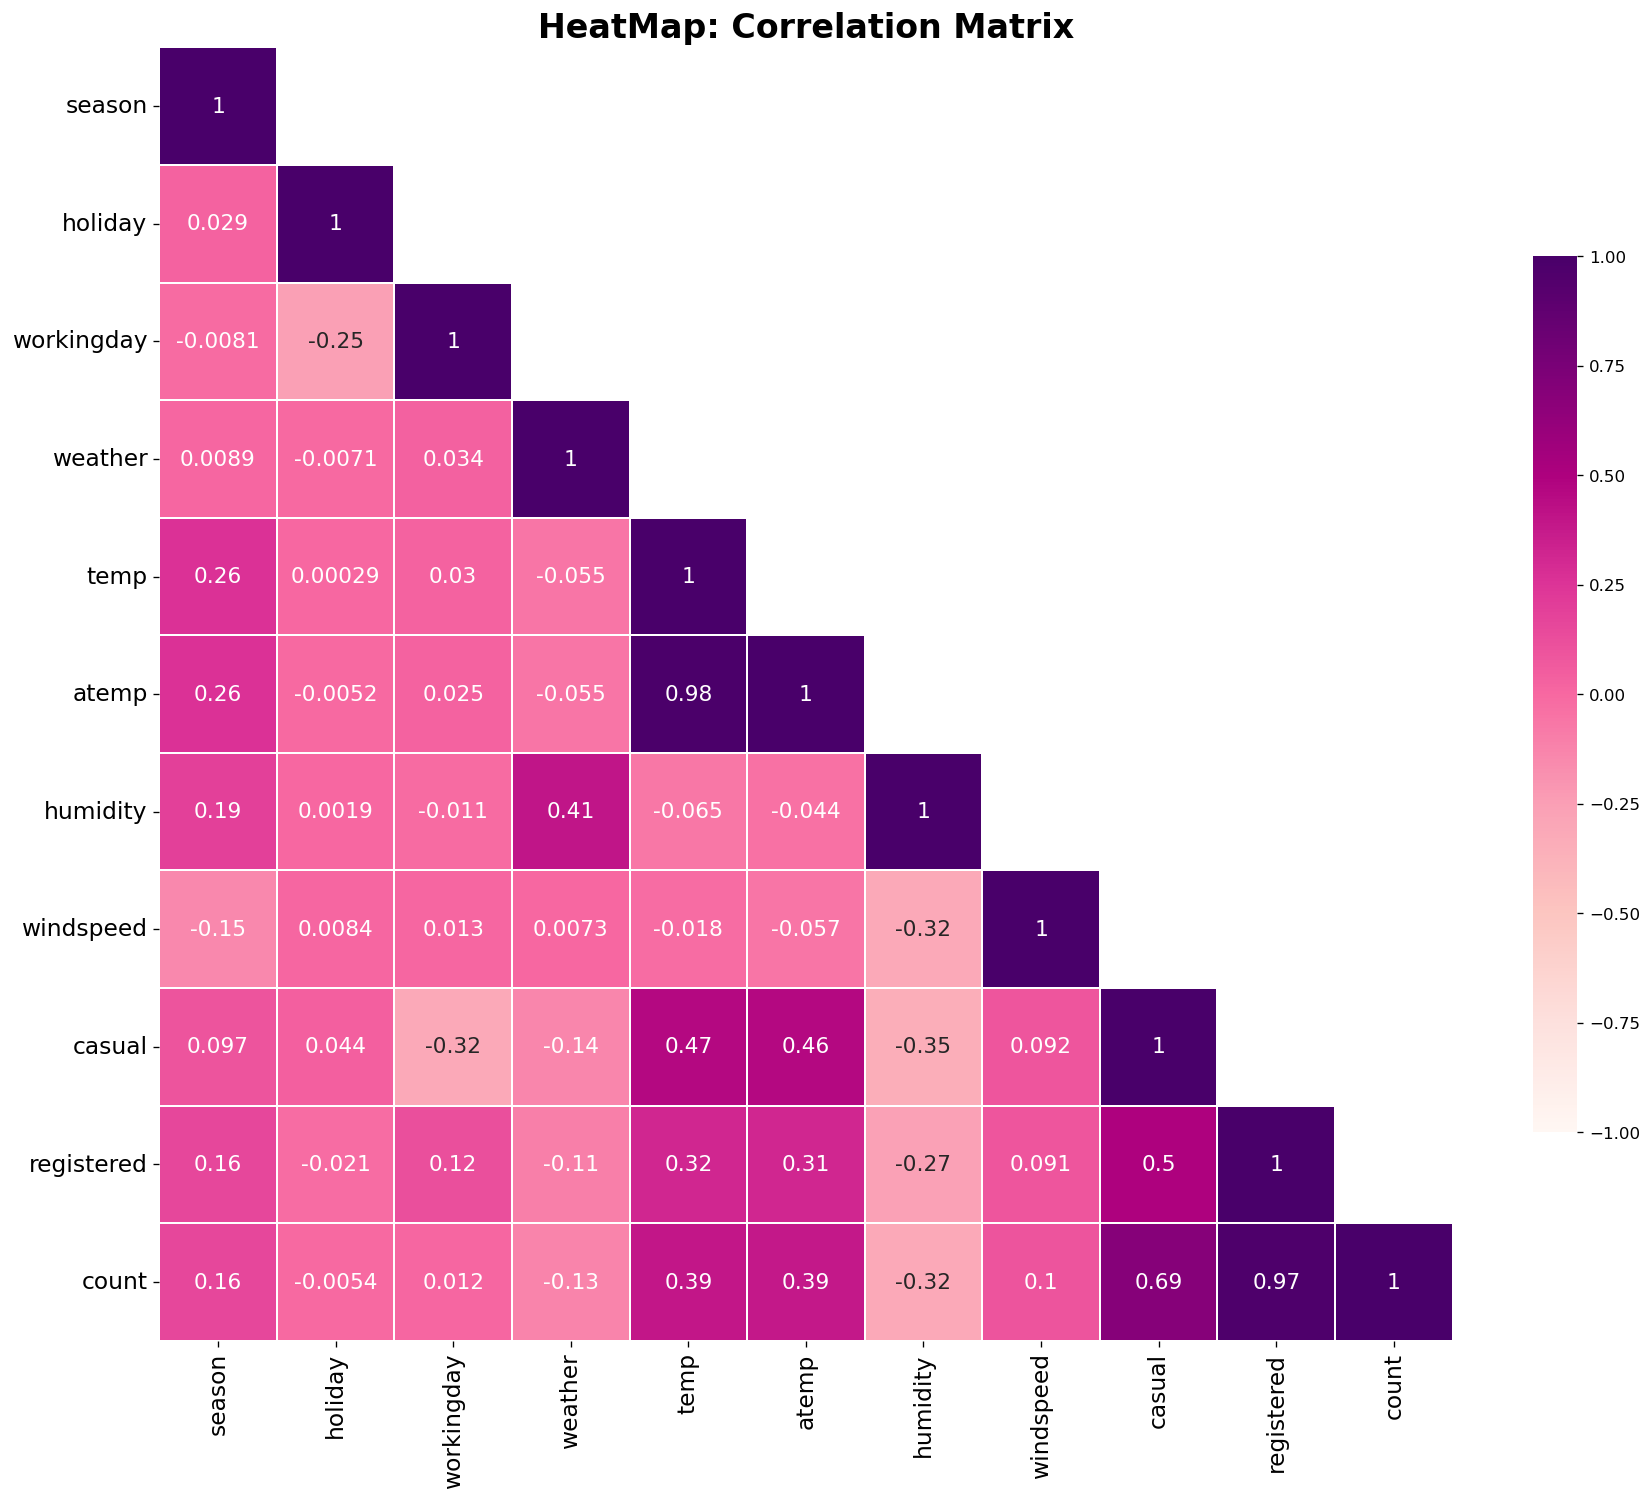

In [22]:
#Plotting a heatmap to understand the correlation between the independent variables
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,15), dpi=120)
corr_data = train.copy()

corr_matrix = corr_data.corr()
f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=120)
# Create a mask to eliminate redundant repetitive correlations
corr_mask = np.array(corr_matrix)
corr_mask[np.tril_indices_from(corr_mask)] = False

# Plot heatmap using correlation matrix and mask
ax_corr1 = sns.heatmap(corr_matrix, cmap= 'RdPu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, mask=corr_mask, annot=True, linewidths=0.01, annot_kws={"size":13})
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plt.title("HeatMap: Correlation Matrix", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.autoscale()
plt.show()

**Observations:**
* Independent features `temp` (real-time temperature in Celsius) and `atemp` ('feels like' temperature in Celsius) are highly correlated with a positive correlation of 0.98; but these features also collectively affect the bike counts.
* `casual` and `registered` are also highly correlated to the target variable `count` but they are ignored while training as these variables are absent in the test data.
* `Holiday` and `working day` show least correlation with 'bike rental counts'
* `weather` and `humidity` is slight negatively correlated with the decision of people deciding to take bike rentals and it intuitively makes sense.

In [23]:
# Dropping highly correlated independent feature 'atemp' from train and test datasets
train.drop(["atemp"], axis=1, inplace=True)
test.drop(["atemp"], axis=1, inplace=True)

In [24]:
# create a new feature
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

train.drop('datetime', axis=1, inplace= True)
test.drop('datetime', axis=1, inplace= True)
train.head()
test.head()

season  holiday  workingday  weather   temp  humidity  windspeed  year  \
0       1        0           1        1  10.66        56    26.0027  2011   
1       1        0           1        1  10.66        56     0.0000  2011   
2       1        0           1        1  10.66        56     0.0000  2011   
3       1        0           1        1  10.66        56    11.0014  2011   
4       1        0           1        1  10.66        56    11.0014  2011   

   month  day  hour  
0      1   20     0  
1      1   20     1  
2      1   20     2  
3      1   20     3  
4      1   20     4

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [25]:
train["season"] = train['season'].astype('category')
train["weather"] = train['weather'].astype('category')
test["season"] = test['season'].astype('category')
test["weather"] = test['weather'].astype('category')

### Creating a new feature 'day_type'
We know that in the given data,
- `holiday` - whether the day is considered a holiday (0: Non-holiday, 1: Holiday)
- `workingday` - whether the day is neither a weekend nor holiday (`0:` Can-be-a-weekend-or-holiday,
                                                                   `1:` No-weekend-No-holiday) 

In [26]:
# Adding features - 'day_type' in train data
train["day_type"]=""
train.loc[(train.holiday==1),"day_type"] = "holiday"
train.loc[((train.holiday==0) & (train.workingday==1)), "day_type"] = "weekday"
train.loc[((train.holiday==0) & (train.workingday==0)), "day_type"] = "weekend"

# Adding features - 'day_type' in test data
test["day_type"]=""
test.loc[(test.holiday==1),"day_type"] = "holiday"
test.loc[((test.holiday==0) & (test.workingday==1)), "day_type"] = "weekday"
test.loc[((test.holiday==0) & (test.workingday==0)), "day_type"] = "weekend"

# Change the datatype to category
train["day_type"] = train["day_type"].astype("category")
test["day_type"] = test["day_type"].astype("category")

In [27]:
# View are new feature
train.head(-4)

season  holiday  workingday weather   temp  humidity  windspeed  casual  \
0          1        0           0       1   9.84        81     0.0000       3   
1          1        0           0       1   9.02        80     0.0000       8   
2          1        0           0       1   9.02        80     0.0000       5   
3          1        0           0       1   9.84        75     0.0000       3   
4          1        0           0       1   9.84        75     0.0000       0   
...      ...      ...         ...     ...    ...       ...        ...     ...   
10877      4        0           1       1  17.22        50    19.0012      28   
10878      4        0           1       1  17.22        50    23.9994      37   
10879      4        0           1       1  16.40        50    26.0027      26   
10880      4        0           1       1  15.58        50    23.9994      23   
10881      4        0           1       1  15.58        50    26.0027       7   

       registered  count  year  month  day  hour day_type  
0              13     16  2011      1    1     0  weekend  
1              32     40  2011      1    1     1  weekend  
2              27     32  2011      1    1     2  weekend  
3              10     13  2011      1    1     3  weekend  
4               1      1  2011      1    1     4  weekend  
...           ...    ...   ...    ...  ...   ...      ...  
10877         209    237  2012     12   19    15  weekday  
10878         297    334  2012     12   19    16  weekday  
10879         536    562  2012     12   19    17  weekday  
10880         546    569  2012     12   19    18  weekday  
10881         329    336  2012     12   19    19  weekday  

[10882 rows x 15 columns]

array([[<AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'hour'}>]], dtype=object)

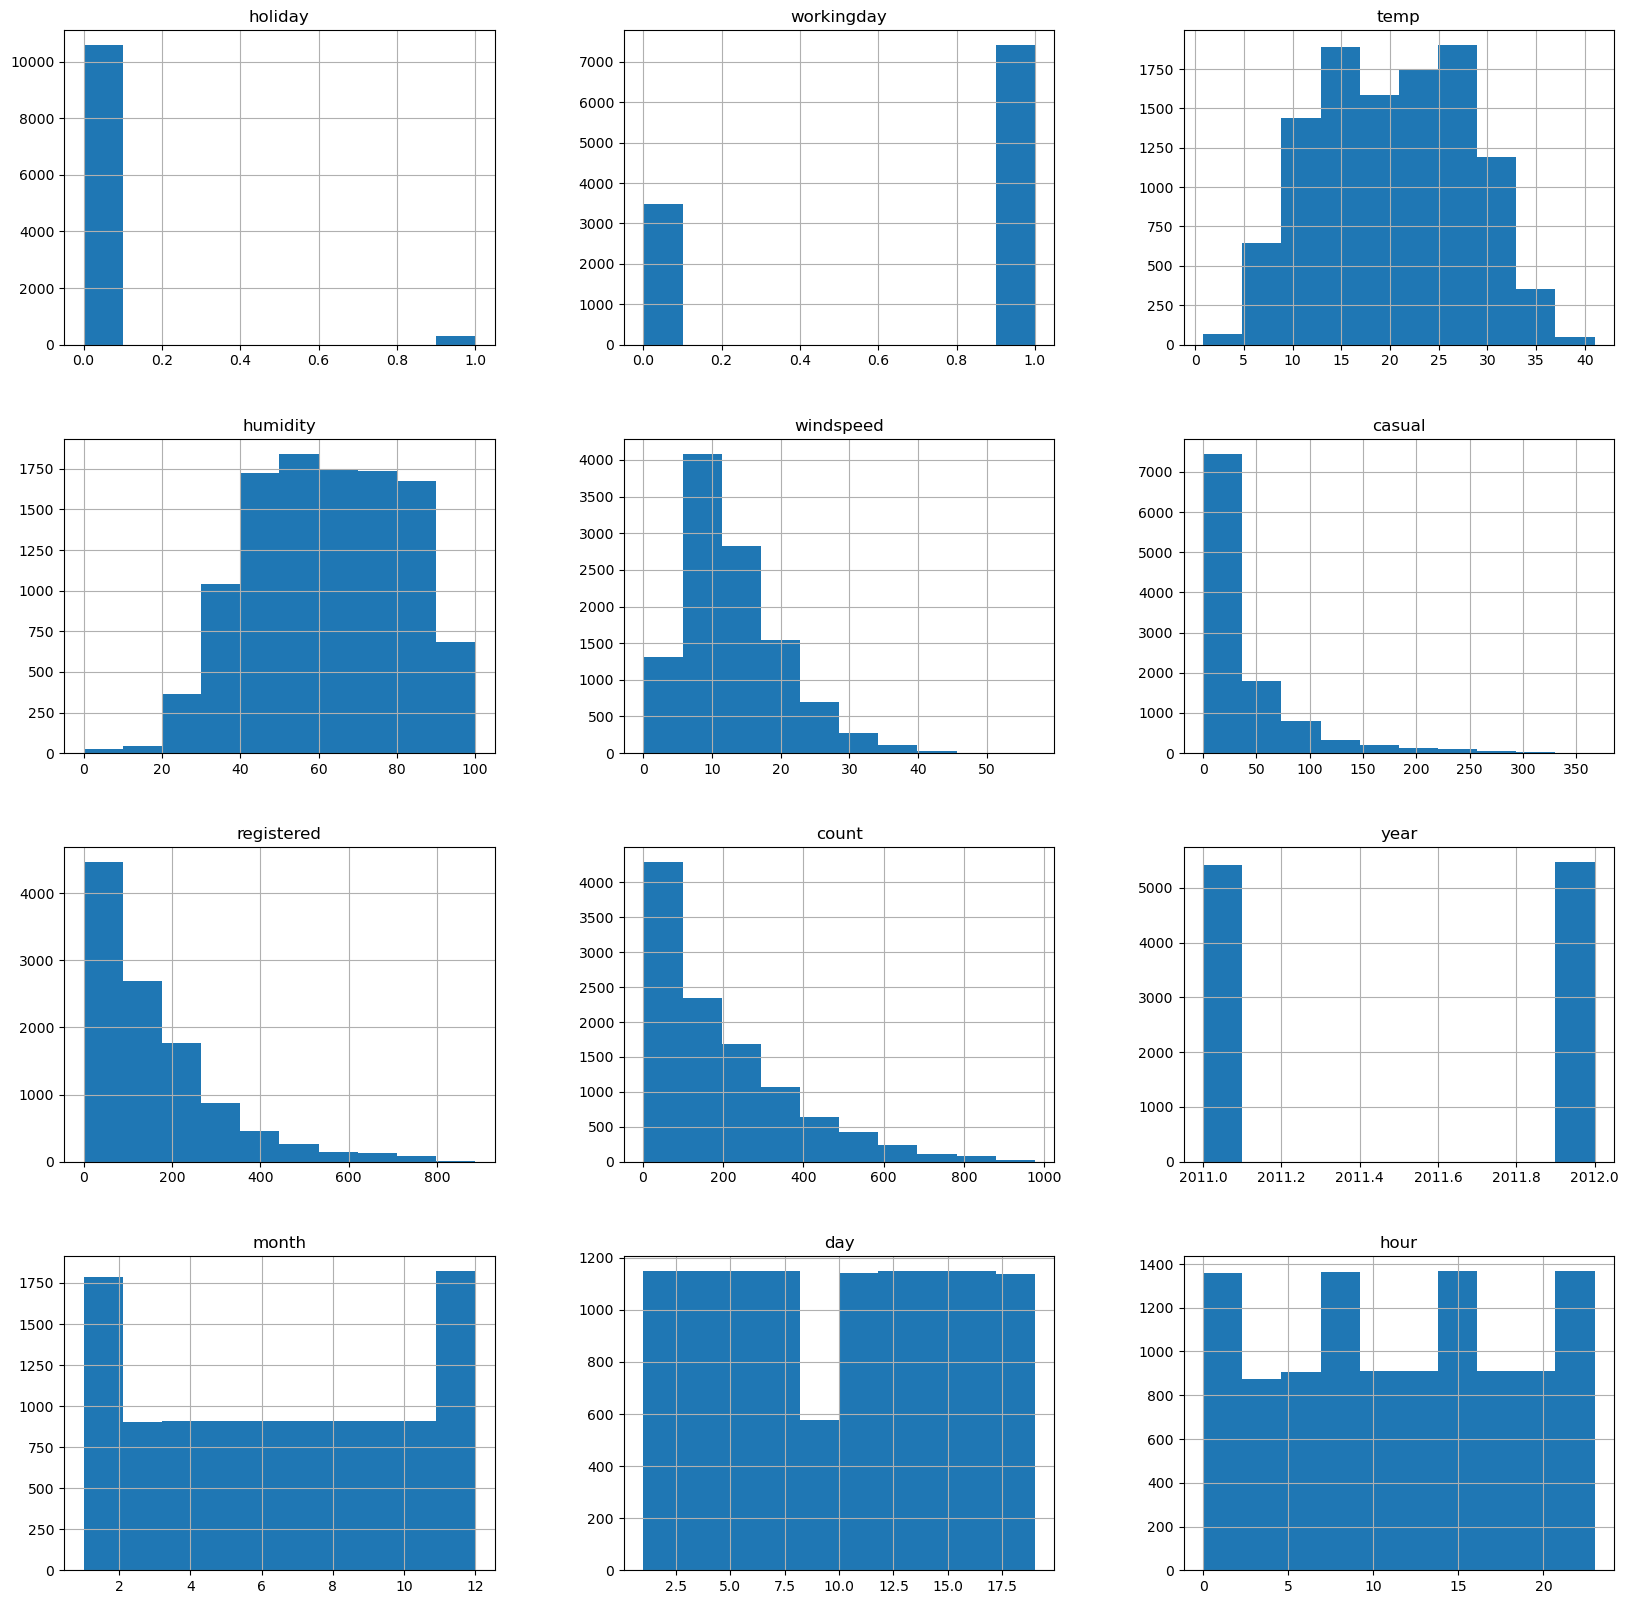

In [28]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(20,20))

<Figure size 1800x1800 with 0 Axes>

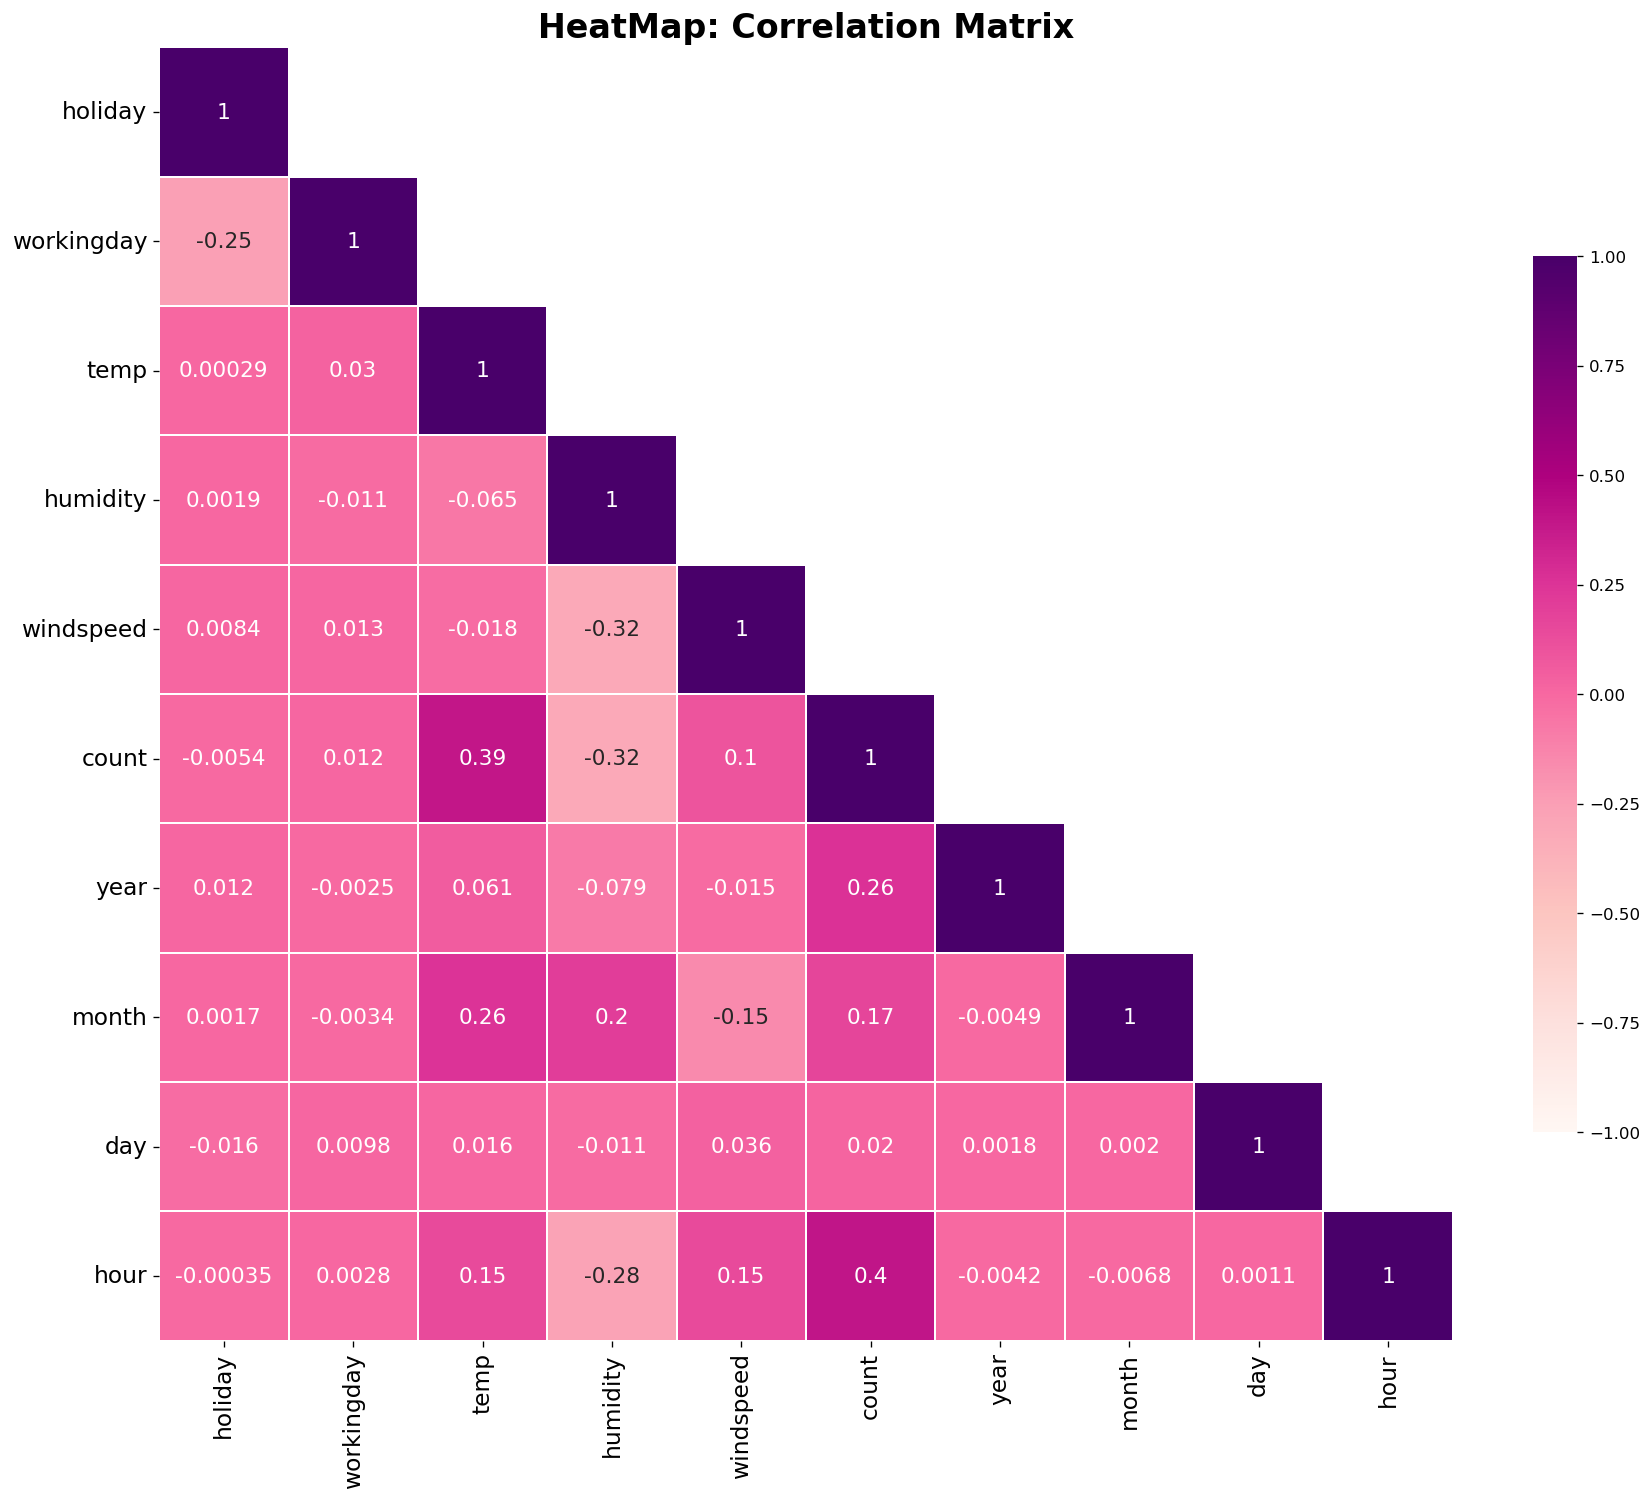

In [29]:
# Recheck: Plotting a heatmap to understand the correlation between the independent variables
# Ignoring 'casual' and 'registered' features
import seaborn as sns
feature_numeric = [i for i in train.columns if i not in ['casual', 'registered']]
plt.figure(figsize = (15,15), dpi=120)
corr_data = train.copy()
corr_matrix = corr_data[feature_numeric].corr()

f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=120)
# Create a mask to eliminate redundant repetitive correlations
corr_mask = np.array(corr_matrix)
corr_mask[np.tril_indices_from(corr_mask)] = False

# Plot heatmap using correlation matrix and mask
ax_corr1 = sns.heatmap(corr_matrix, cmap= 'RdPu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, mask=corr_mask, annot=True, linewidths=0.01, annot_kws={"size":13})
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plt.title("HeatMap: Correlation Matrix", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.autoscale()
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [30]:
predictor_new_features = TabularPredictor(label = 'count', eval_metric = 'root_mean_squared_error').fit(
    train_data = train.drop(['casual','registered'], axis= 1), time_limit = 600, presets = 'best_quality' )

No path specified. Models will be saved in: "AutogluonModels/ag-20230807_152450/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230807_152450/"
AutoGluon Version:  0.8.2
Python Version:     3.10.6
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Jun 27 21:49:00 UTC 2023
Disk Space Avail:   9223372031.45 GB / 9223372036.85 GB (100.0%)
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem

In [31]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -36.051976      40.338589  528.477978                0.001101           0.463591            3       True         14
1      WeightedEnsemble_L2  -36.113671      37.889091  360.406380                0.001051           0.566786            2       True          9
2          CatBoost_BAG_L2  -36.370424      39.353760  464.633219                0.099755          62.871521            2       True         13
3   RandomForestMSE_BAG_L2  -36.649768      40.069879  439.479266                0.815873          37.717568            2       True         12
4          LightGBM_BAG_L2  -36.698769      39.421861  427.425297                0.167855          25.663600            2       True         11
5        LightGBMXT_BAG_L2  -37.238308      39.697053  428.359151         

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -122.81616271859724,
  'KNeighborsDist_BAG_L1': -118.5606371564121,
  'LightGBMXT_BAG_L1': -37.343518837223215,
  'LightGBM_BAG_L1': -38.03945763795257,
  'RandomForestMSE_BAG_L1': -41.98

In [32]:
# Leaderboard dataframe
leaderboard_new_features_df = pd.DataFrame(predictor_new_features.leaderboard(silent=True))
leaderboard_new_features_df

model   score_val  pred_time_val    fit_time  \
0      WeightedEnsemble_L3  -36.051976      40.338589  528.477978   
1      WeightedEnsemble_L2  -36.113671      37.889091  360.406380   
2          CatBoost_BAG_L2  -36.370424      39.353760  464.633219   
3   RandomForestMSE_BAG_L2  -36.649768      40.069879  439.479266   
4          LightGBM_BAG_L2  -36.698769      39.421861  427.425297   
5        LightGBMXT_BAG_L2  -37.238308      39.697053  428.359151   
6        LightGBMXT_BAG_L1  -37.343519      32.293900  126.345168   
7          LightGBM_BAG_L1  -38.039458       3.963467   49.440902   
8          CatBoost_BAG_L1  -39.741506       0.184577  164.683614   
9     ExtraTreesMSE_BAG_L1  -40.949299       0.781320    7.122247   
10  RandomForestMSE_BAG_L1  -41.986954       0.664777   12.247663   
11   KNeighborsDist_BAG_L1 -118.560637       0.105706    0.021012   
12   KNeighborsUnif_BAG_L1 -122.816163       0.135425    0.020535   
13  NeuralNetFastAI_BAG_L1 -124.629647       1.124835   41.880557   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.001101           0.463591            3       True   
1                 0.001051           0.566786            2       True   
2                 0.099755          62.871521            2       True   
3                 0.815873          37.717568            2       True   
4                 0.167855          25.663600            2       True   
5                 0.443047          26.597453            2       True   
6                32.293900         126.345168            1       True   
7                 3.963467          49.440902            1       True   
8                 0.184577         164.683614            1       True   
9                 0.781320           7.122247            1       True   
10                0.664777          12.247663            1       True   
11                0.105706           0.021012            1       True   
12                0.135425           0.020535            1       True   
13                1.124835          41.880557            1       True   

    fit_order  
0          14  
1           9  
2          13  
3          12  
4          11  
5          10  
6           3  
7           4  
8           6  
9           7  
10          5  
11          2  
12          1  
13          8

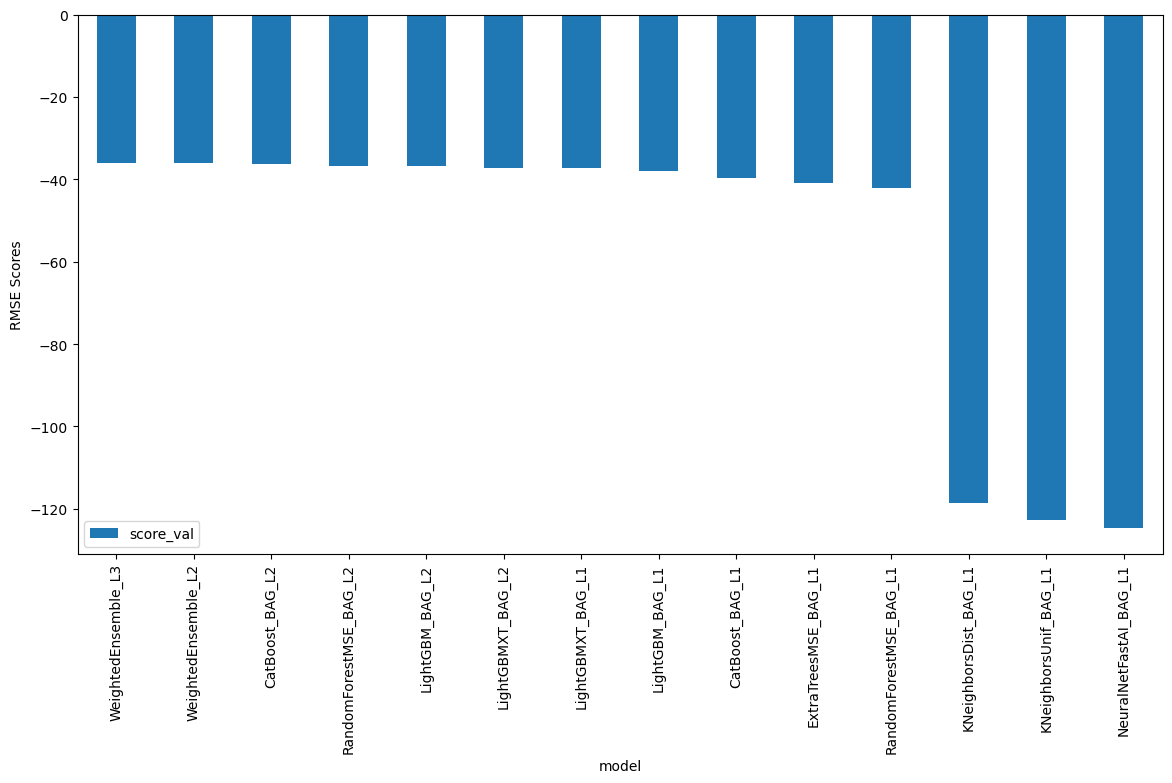

In [33]:
# Output the model's `score_val` in a bar chart to compare performance
import matplotlib.pyplot as plt
leaderboard_new_features_df.plot(kind="bar", x="model", y="score_val", figsize=(14, 7))
plt.ylabel("RMSE Scores")
plt.show()

In [34]:
# Remember to set all negative values to zero
predictor_new_features = predictor_new_features.predict(test)
predictor_new_features.head()

0    14.614637
1     5.749660
2     5.306003
3     4.998220
4     4.689542
Name: count, dtype: float32

In [35]:
# Describe the `predictions_new_features` series to see if there are any negative values
predictor_new_features.describe()

count    6493.000000
mean      189.587463
std       173.615448
min         3.136572
25%        45.165188
50%       147.088135
75%       282.687073
max       884.588989
Name: count, dtype: float64

**Observations:**
* Since the minimum value in predictions series is `3.529928`, we can safely say that there are *no negative values* in the predictions.

In [36]:
# How many negative values do we have?
negative_pred_count = predictor_new_features.apply(lambda x: 1 if x<0 else 0)

pred_neg_count = (negative_pred_count==1).sum()
print("Total negative prediction values :", negative_count)

Total negative prediction values : 0


In [37]:
# Set them to zero
negative_count = normal_predictions[normal_predictions<0] = 0
print(f"No. of negative predictions: {negative_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [38]:
# Same submitting predictions
submission["count"] = predictor_new_features
submission.to_csv("submission_new_features.csv", index=False)

In [39]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 522kB/s]
Successfully submitted to Bike Sharing Demand

In [40]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-08-07 15:36:58  new features                         complete  0.45750      0.45750       
submission.csv               2023-08-07 15:24:40  first raw submission2                complete  1.80023      1.80023       
submission_new_hpo2.csv      2023-08-07 14:28:00  new features with hyperparameters 2  complete  0.52427      0.52427       
submission_new_hpo.csv       2023-08-07 14:24:22  new features with hyperparameters    complete  0.53594      0.53594       


#### New Score of `0.45750`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [41]:
# Requirements: (Same settings as initial run) For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error' 
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 60*10 = 600 seconds
presets = "optimize_for_deployment"                             

In [42]:
import autogluon.core as ag
## From autogluon documentation

nn_options = {'num_epochs': 5, 
              'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  
                    # learning rate used in training (real-valued hyperparameter searched on log-scale)
              'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  
                    # activation function used in NN (categorical hyperparameter, default = first entry)
              'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1)}

gbm_options = [{'extra_trees': True, 
                'num_boost_round': ag.space.Int(lower=100, upper=500, default=100),
                'num_leaves': ag.space.Int(lower=25, upper=64, default=36),
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options, 
                  }  

num_trials = 20            # Number of hyperparameter optimization trials you want to perform
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler
scheduler = 'local'       # Local FIFO scheduler

hyperparameter_tune_kwargs = { 
    'num_trials': num_trials,
    'scheduler' : scheduler,
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error',
                                    learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                         train_data=train, 
                                                                         time_limit=time_limit,
                                                                         presets=presets, 
                                                                         hyperparameters=hyperparameters, 
                                                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                         refit_full='best')

Fitted model: NeuralNetTorch/cb65fedf ...
	-116.8593	 = Validation score   (-root_mean_squared_error)
	6.13s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: NeuralNetTorch/660ff4fb ...
	-82.4343	 = Validation score   (-root_mean_squared_error)
	18.94s	 = Training   runtime
	0.1s	 = Validation runtime
Fitted model: NeuralNetTorch/bc60dd66 ...
	-130.0111	 = Validation score   (-root_mean_squared_error)
	8.63s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: NeuralNetTorch/2284c7a1 ...
	-100.3519	 = Validation score   (-root_mean_squared_error)
	10.26s	 = Training   runtime
	0.08s	 = Validation runtime
Fitted model: NeuralNetTorch/e0dbf0b2 ...
	-144.5908	 = Validation score   (-root_mean_squared_error)
	5.76s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: NeuralNetTorch/bdd46a8a ...
	-117.2513	 = Validation score   (-root_mean_squared_error)
	7.59s	 = Training   runtime
	0.08s	 = Validation runtime
Fitted model: NeuralNetTorch/c6e79b17 ..

[1000]	valid_set's rmse: 40.5345


	-40.4603	 = Validation score   (-root_mean_squared_error)
	3.96s	 = Training   runtime
	0.41s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 307.55s of remaining time.
	-39.6779	 = Validation score   (-root_mean_squared_error)
	0.51s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 293.26s ... Best model: "WeightedEnsemble_L2"
Automatically performing refit_full as a post-fit operation (due to `.fit(..., refit_full=True)`
Refitting models via `predictor.refit_full` using all of the data (combined train and validation)...
	Models trained in this way will have the suffix "_FULL" and have NaN validation score.
	This process is not bound by time_limit, but should take less time than the original `predictor.fit` call.
	To learn more, refer to the `.refit_full` method docstring which explains how "_FULL" models differ from normal models.
Fitting 1 L1 models ...
Fitting model: LightGBM/T2_FULL 

In [43]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2 -39.677927       3.522866  32.235471                0.001147           0.513853            2       True          6
1            LightGBMLarge -40.460349       0.407143   3.961316                0.407143           3.961316            1       True          5
2              LightGBM/T4 -40.640473       2.616786  14.300102                2.616786          14.300102            1       True          2
3              LightGBM/T7 -40.940618       0.228602   2.529006                0.228602           2.529006            1       True          3
4              LightGBM/T2 -40.959109       0.183709   2.511688                0.183709           2.511688            1       True          1
5  NeuralNetTorch/fa0cfdb5 -70.066771       0.085479   8.419506                0.08547

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM/T2': 'LGBModel',
  'LightGBM/T4': 'LGBModel',
  'LightGBM/T7': 'LGBModel',
  'NeuralNetTorch/fa0cfdb5': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T2': -40.9591085151314,
  'LightGBM/T4': -40.640473254059366,
  'LightGBM/T7': -40.94061771360491,
  'NeuralNetTorch/fa0cfdb5': -70.06677094725448,
  'LightGBMLarge': -40.46034858071044,
  'WeightedEnsemble_L2': -39.67792664356042},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T2': 'AutogluonModels/ag-20230807_153700/models/LightGBM/T2/',
  'LightGBM/T4': 'AutogluonModels/ag-20230807_153700/models/LightGBM/T4/',
  'LightGBM/T7': 'AutogluonModels/ag-20230807_153700/models/LightGBM/T7/',
  'NeuralNetTorch/fa0cfdb5': 'AutogluonModels/ag-20230807_153700/models/NeuralNetTorch/fa0cfdb5/',
  'LightGBMLarge': 'AutogluonModels/ag-20230807_153700/models/LightGBMLarge/',
  'WeightedEnsemble_L2': 'Autogluon

In [44]:
# Leaderboard dataframe
leaderboard_new_hpo_df = pd.DataFrame(predictor_new_hpo.leaderboard(silent=True))
leaderboard_new_hpo_df

model  score_val  pred_time_val   fit_time  \
0      WeightedEnsemble_L2 -39.677927       3.522866  32.235471   
1            LightGBMLarge -40.460349       0.407143   3.961316   
2              LightGBM/T4 -40.640473       2.616786  14.300102   
3              LightGBM/T7 -40.940618       0.228602   2.529006   
4              LightGBM/T2 -40.959109       0.183709   2.511688   
5  NeuralNetTorch/fa0cfdb5 -70.066771       0.085479   8.419506   

   pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                0.001147           0.513853            2       True   
1                0.407143           3.961316            1       True   
2                2.616786          14.300102            1       True   
3                0.228602           2.529006            1       True   
4                0.183709           2.511688            1       True   
5                0.085479           8.419506            1       True   

   fit_order  
0          6  
1          5  
2          2  
3          3  
4          1  
5          4

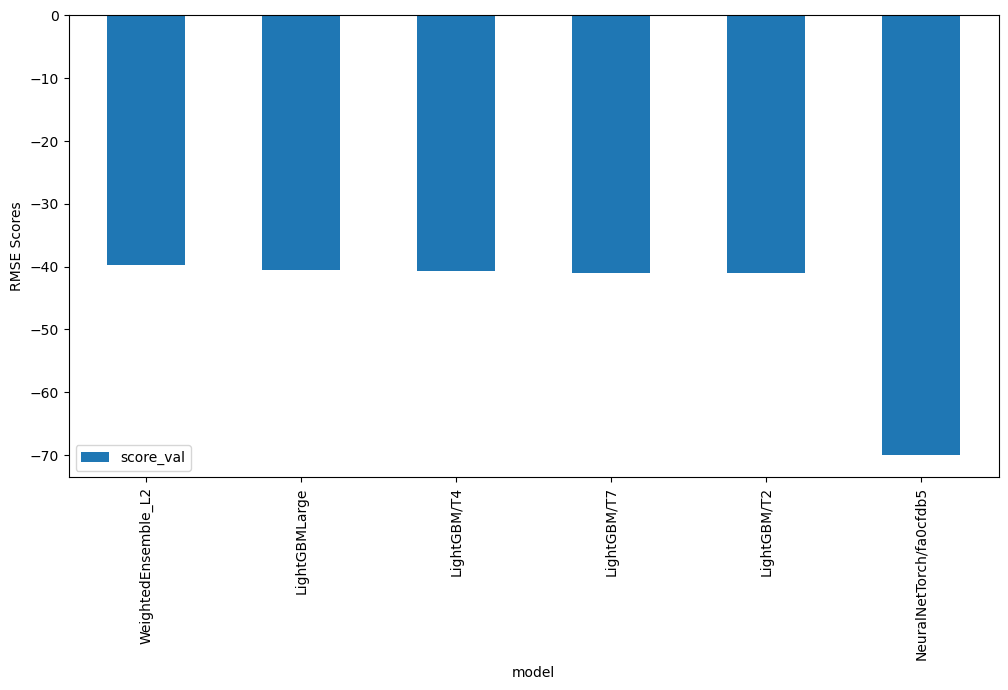

In [45]:
# Output the model's `score_val` in a bar chart to compare performance
import matplotlib.pyplot as plt
leaderboard_new_hpo_df.plot(kind="bar", x="model", y="score_val", figsize=(12, 6))
plt.ylabel("RMSE Scores")
plt.show()

In [46]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    13.440561
1     2.264815
2    -0.111627
3     0.957982
4     1.050252
Name: count, dtype: float32

In [47]:
predictions_new_hpo.describe()

count    6493.000000
mean      190.336349
std       172.333298
min       -21.179886
25%        47.459503
50%       149.159073
75%       286.749268
max       876.383789
Name: count, dtype: float64

In [48]:
# How many negative values do we have?
negative_pred_count = predictions_new_hpo.apply(lambda x: 1 if x<0 else 0)

pred_neg_count = (negative_pred_count==1).sum()
print("Total negative prediction values :", pred_neg_count)

Total negative prediction values : 88


In [49]:
# Remember to set all negative values to zero 
predictions_new_hpo[predictions_new_hpo<0] = 0  

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions_new_hpo.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [51]:
submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo.head()

datetime  count
0 2011-01-20 00:00:00      0
1 2011-01-20 01:00:00      0
2 2011-01-20 02:00:00      0
3 2011-01-20 03:00:00      0
4 2011-01-20 04:00:00      0

In [52]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [53]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 328kB/s]
Successfully submitted to Bike Sharing Demand

In [54]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 5

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-08-07 15:44:50  new features with hyperparameters    complete  0.53552      0.53552       
submission_new_features.csv  2023-08-07 15:36:58  new features                         complete  0.45750      0.45750       
submission.csv               2023-08-07 15:24:40  first raw submission2                complete  1.80023      1.80023       


#### New Score of `0.53552`

##  Hyper parameter optimization Second time with Changes in Hyper Parameter 

In [55]:
# Requirements: (Same settings as initial run) For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error' 
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 60*10 = 600 seconds
presets = "optimize_for_deployment" 

In [56]:
# Define hyperparameter tuning options
import autogluon.core as ag
nn_options = {'num_epochs': 5, 
              'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  
                    # learning rate used in training (real-valued hyperparameter searched on log-scale)
              'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  
                    # activation function used in NN (categorical hyperparameter, default = first entry)
              'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1)}

gbm_options = [{'extra_trees': True, 
                'num_boost_round': ag.space.Int(lower=100, upper=500, default=100),
                'num_leaves': ag.space.Int(lower=25, upper=64, default=36),
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options, 
                  }  

num_trials = 20            # Number of hyperparameter optimization trials you want to perform
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler
scheduler = 'local'       # Local FIFO scheduler

hyperparameter_tune_kwargs = { 
    'num_trials': num_trials,
    'scheduler' : scheduler,
    'searcher': search_strategy,
}

predictor_new_hpo1 = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error',
                                    learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                         train_data=train, 
                                                                         time_limit=time_limit,
                                                                         presets=presets, 
                                                                         hyperparameters=hyperparameters, 
                                                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                         refit_full='best')

Fitted model: NeuralNetTorch/f6ceac0b ...
	-116.8593	 = Validation score   (-root_mean_squared_error)
	6.57s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: NeuralNetTorch/bbdca2e5 ...
	-82.9579	 = Validation score   (-root_mean_squared_error)
	5.56s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: NeuralNetTorch/01501d97 ...
	-100.2377	 = Validation score   (-root_mean_squared_error)
	15.25s	 = Training   runtime
	0.08s	 = Validation runtime
Fitted model: NeuralNetTorch/8ba03373 ...
	-141.8747	 = Validation score   (-root_mean_squared_error)
	6.27s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: NeuralNetTorch/f86f16ea ...
	-70.1777	 = Validation score   (-root_mean_squared_error)
	5.21s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: NeuralNetTorch/a529fafa ...
	-141.8359	 = Validation score   (-root_mean_squared_error)
	3.85s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: NeuralNetTorch/02cff89f ...

[1000]	valid_set's rmse: 40.5345


	-40.4603	 = Validation score   (-root_mean_squared_error)
	4.5s	 = Training   runtime
	0.34s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 305.53s of remaining time.
	-39.6898	 = Validation score   (-root_mean_squared_error)
	0.55s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 295.29s ... Best model: "WeightedEnsemble_L2"
Automatically performing refit_full as a post-fit operation (due to `.fit(..., refit_full=True)`
Refitting models via `predictor.refit_full` using all of the data (combined train and validation)...
	Models trained in this way will have the suffix "_FULL" and have NaN validation score.
	This process is not bound by time_limit, but should take less time than the original `predictor.fit` call.
	To learn more, refer to the `.refit_full` method docstring which explains how "_FULL" models differ from normal models.
Fitting 1 L1 models ...
Fitting model: LightGBM/T2_FULL .

In [57]:
predictor_new_hpo1.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2 -39.689750       4.100801  29.558388                0.000664           0.546568            2       True          6
1            LightGBMLarge -40.460349       0.344345   4.500406                0.344345           4.500406            1       True          5
2              LightGBM/T4 -40.640473       2.764272  13.563638                2.764272          13.563638            1       True          2
3              LightGBM/T7 -40.940618       0.745768   2.803899                0.745768           2.803899            1       True          3
4              LightGBM/T2 -40.959109       0.180196   2.586938                0.180196           2.586938            1       True          1
5  NeuralNetTorch/bbdca2e5 -82.957912       0.065555   5.556940                0.06555

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM/T2': 'LGBModel',
  'LightGBM/T4': 'LGBModel',
  'LightGBM/T7': 'LGBModel',
  'NeuralNetTorch/bbdca2e5': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T2': -40.9591085151314,
  'LightGBM/T4': -40.640473254059366,
  'LightGBM/T7': -40.94061771360491,
  'NeuralNetTorch/bbdca2e5': -82.95791195981032,
  'LightGBMLarge': -40.46034858071044,
  'WeightedEnsemble_L2': -39.689750153841906},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T2': 'AutogluonModels/ag-20230807_154452/models/LightGBM/T2/',
  'LightGBM/T4': 'AutogluonModels/ag-20230807_154452/models/LightGBM/T4/',
  'LightGBM/T7': 'AutogluonModels/ag-20230807_154452/models/LightGBM/T7/',
  'NeuralNetTorch/bbdca2e5': 'AutogluonModels/ag-20230807_154452/models/NeuralNetTorch/bbdca2e5/',
  'LightGBMLarge': 'AutogluonModels/ag-20230807_154452/models/LightGBMLarge/',
  'WeightedEnsemble_L2': 'Autogluo

In [58]:
# Leaderboard dataframe
leaderboard_new_hpo1_df = pd.DataFrame(predictor_new_hpo1.leaderboard(silent=True))
leaderboard_new_hpo1_df

model  score_val  pred_time_val   fit_time  \
0      WeightedEnsemble_L2 -39.689750       4.100801  29.558388   
1            LightGBMLarge -40.460349       0.344345   4.500406   
2              LightGBM/T4 -40.640473       2.764272  13.563638   
3              LightGBM/T7 -40.940618       0.745768   2.803899   
4              LightGBM/T2 -40.959109       0.180196   2.586938   
5  NeuralNetTorch/bbdca2e5 -82.957912       0.065555   5.556940   

   pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                0.000664           0.546568            2       True   
1                0.344345           4.500406            1       True   
2                2.764272          13.563638            1       True   
3                0.745768           2.803899            1       True   
4                0.180196           2.586938            1       True   
5                0.065555           5.556940            1       True   

   fit_order  
0          6  
1          5  
2          2  
3          3  
4          1  
5          4

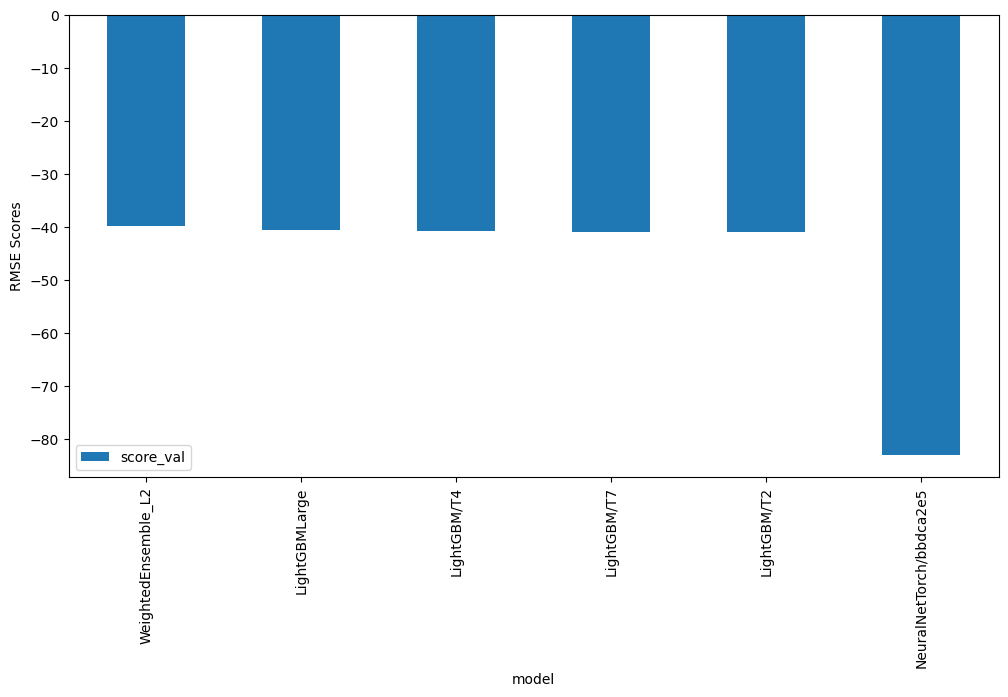

In [59]:
# Output the model's `score_val` in a bar chart to compare performance
import matplotlib.pyplot as plt
leaderboard_new_hpo1_df.plot(kind="bar", x="model", y="score_val", figsize=(12, 6))
plt.ylabel("RMSE Scores")
plt.show()

In [60]:
# Remember to set all negative values to zero
predictions_new_hpo1 = predictor_new_hpo.predict(test)
predictions_new_hpo1.head()

0    13.440561
1     2.264815
2    -0.111627
3     0.957982
4     1.050252
Name: count, dtype: float32

In [61]:
# Describe the `predictions_new_hpo` series to see if there are any negative values
predictions_new_hpo1.describe()

count    6493.000000
mean      190.336349
std       172.333298
min       -21.179886
25%        47.459503
50%       149.159073
75%       286.749268
max       876.383789
Name: count, dtype: float64

**Observations:**
* Since the minimum value in predictions series is `(-20.90)`, we do have *negative values* in the predictions.

In [62]:
# How many negative values do we have?
negative_pred_count = predictions_new_hpo1.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print("Total negative prediction values :", pred_neg_count)

Total negative prediction values : 88


In [63]:
# Set them to zero
predictions_new_hpo1[predictions_new_hpo1<0] = 0 

negative_pred_count = predictions_new_hpo1.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [64]:
# Same submitting predictions
submission["count"] = predictions_new_hpo1
submission.to_csv("submission_new_hpo.csv", index=False)

In [65]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 332kB/s]
Successfully submitted to Bike Sharing Demand

In [66]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-08-07 15:50:42  new features with hyperparameters    complete  0.53552      0.53552       
submission_new_hpo.csv       2023-08-07 15:44:50  new features with hyperparameters    complete  0.53552      0.53552       
submission_new_features.csv  2023-08-07 15:36:58  new features                         complete  0.45750      0.45750       
submission.csv               2023-08-07 15:24:40  first raw submission2                complete  1.80023      1.80023       


#### New Score of `0.53594`

## Step 6: Hyper parameter optimization Third Time with Some changes in Hyper Parameter

In [67]:
# Requirements: (Same settings as initial run) For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error' 
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 1200                             # 10 minutes -> 600 seconds
presets = "optimize_for_deployment"          

In [68]:
import autogluon.core as ag
## From autogluon documentation

# Exclude ['NN_TORCH'] family of models
excluded_model_types = ['NN_TORCH']


# Considering GBM, XT, XGB, KNN and RF model types (as these along with WeightedEnsembles have shown good results in the past)
# For GBM
gbm_options = [{'extra_trees': True, 
                'num_boost_round': ag.space.Int(lower=100, upper=800, default=100),
                'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']
# XT Models
xt_options = {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}}
# XGB Models
xgb_options = [{'objective': 'reg:squarederror', # 'reg:linear' is deprecated
                'eval_metric': 'rmse', 
                'max_depth':ag.space.Int(lower=5, upper=8, default=6), 
                'n_estimators': ag.space.Int(lower=100, upper=500, default=100), 
                'eta':.3, 
                'subsample': 1,
                'colsample_bytree': 1}]
# Random Forest Models
rf_options = {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}}
# KNN
knn_options = [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Uniform'}}, 
               {'weights': 'distance', 'ag_args': {'name_suffix': 'Distance'}}]  # default

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'KNN': knn_options,
                   'XT': xt_options,
                   'XGB': xgb_options,
                   'RF': rf_options
                  }  


num_trials = 20            # Number of hyperparameter optimization trials you want to perform
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler
scheduler = 'local'       # Local FIFO scheduler

hyperparameter_tune_kwargs = { 
                            'num_trials': num_trials,
                            'scheduler' : scheduler,
                            'searcher': search_strategy,
                        }


predictor_new_hpo2 = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error',
                                    learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                         train_data=train, 
                                                                         time_limit=time_limit,
                                                                         presets=presets, 
                                                                         hyperparameters=hyperparameters, 
                                                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                         excluded_model_types=excluded_model_types,
                                                                         refit_full='best')

No path specified. Models will be saved in: "AutogluonModels/ag-20230807_155044/"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 1200s
AutoGluon will save models to "AutogluonModels/ag-20230807_155044/"
AutoGluon Version:  0.8.2
Python Version:     3.10.6
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Jun 27 21:49:00 UTC 2023
Disk Space Avail:   9223372030.22 GB / 9223372036.85 GB (100.0%)
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1847.91 MB
	Train Data (Original)  Memory Usage: 0.82 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Gene

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: LightGBMXT/T1 ...
	-71.8448	 = Validation score   (-root_mean_squared_error)
	0.51s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: LightGBMXT/T2 ...
	-43.9632	 = Validation score   (-root_mean_squared_error)
	1.16s	 = Training   runtime
	0.15s	 = Validation runtime
Fitted model: LightGBMXT/T3 ...
	-84.9059	 = Validation score   (-root_mean_squared_error)
	0.74s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: LightGBMXT/T4 ...
	-50.5989	 = Validation score   (-root_mean_squared_error)
	1.92s	 = Training   runtime
	0.35s	 = Validation runtime
Fitted model: LightGBMXT/T5 ...
	-88.8151	 = Validation score   (-root_mean_squared_error)
	0.81s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: LightGBMXT/T6 ...
	-59.8571	 = Validation score   (-root_mean_squared_error)
	1.19s	 = Training   runtime
	0.12s	 = Validation runtime
Fitted model: LightGBMXT/T7 ...
	-41.2622	 = Validation score   (-root_mean_squared_error)
	2.1s	 = Traini

  0%|          | 0/20 [00:00<?, ?it/s]

[1000]	valid_set's rmse: 41.3519
[1000]	valid_set's rmse: 41.8256
[1000]	valid_set's rmse: 42.0312
[2000]	valid_set's rmse: 40.883
[3000]	valid_set's rmse: 40.7899
[4000]	valid_set's rmse: 40.6585
[5000]	valid_set's rmse: 40.6971
[1000]	valid_set's rmse: 41.7228
[1000]	valid_set's rmse: 41.8302
[2000]	valid_set's rmse: 41.2604
[1000]	valid_set's rmse: 41.0627
[2000]	valid_set's rmse: 40.7912
[1000]	valid_set's rmse: 41.7483
[2000]	valid_set's rmse: 41.257
[3000]	valid_set's rmse: 41.1837
[1000]	valid_set's rmse: 41.3799
[2000]	valid_set's rmse: 41.2112
[1000]	valid_set's rmse: 42.8405
[2000]	valid_set's rmse: 42.2421
[3000]	valid_set's rmse: 42.0018
[4000]	valid_set's rmse: 41.7935
[5000]	valid_set's rmse: 41.6882
[6000]	valid_set's rmse: 41.5377
[7000]	valid_set's rmse: 41.5578
[8000]	valid_set's rmse: 41.5713
[9000]	valid_set's rmse: 41.5091
[10000]	valid_set's rmse: 41.5299
[1000]	valid_set's rmse: 45.5751
[2000]	valid_set's rmse: 43.4223
[3000]	valid_set's rmse: 42.7833
[4000]	vali

	Stopping HPO to satisfy time limit...
Fitted model: LightGBM/T1 ...
	-41.2147	 = Validation score   (-root_mean_squared_error)
	2.51s	 = Training   runtime
	0.49s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	-40.9591	 = Validation score   (-root_mean_squared_error)
	3.34s	 = Training   runtime
	0.21s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	-41.7695	 = Validation score   (-root_mean_squared_error)
	2.68s	 = Training   runtime
	0.44s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	-40.6405	 = Validation score   (-root_mean_squared_error)
	13.8s	 = Training   runtime
	2.58s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	-41.1569	 = Validation score   (-root_mean_squared_error)
	2.52s	 = Training   runtime
	0.3s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	-41.7228	 = Validation score   (-root_mean_squared_error)
	4.61s	 = Training   runtime
	0.54s	 = Validation runtime
Fitted model: LightGBM/T7 ...
	-40.9406	 = Validation score   (-root_mean_square

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: XGBoost/T1 ...
	-44.4728	 = Validation score   (-root_mean_squared_error)
	0.62s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: XGBoost/T2 ...
	-43.5339	 = Validation score   (-root_mean_squared_error)
	1.37s	 = Training   runtime
	0.08s	 = Validation runtime
Fitted model: XGBoost/T3 ...
	-42.8591	 = Validation score   (-root_mean_squared_error)
	1.68s	 = Training   runtime
	0.65s	 = Validation runtime
Fitted model: XGBoost/T4 ...
	-47.1858	 = Validation score   (-root_mean_squared_error)
	0.69s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: XGBoost/T5 ...
	-46.9777	 = Validation score   (-root_mean_squared_error)
	2.0s	 = Training   runtime
	0.12s	 = Validation runtime
Fitted model: XGBoost/T6 ...
	-42.3764	 = Validation score   (-root_mean_squared_error)
	1.43s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: XGBoost/T7 ...
	-45.3107	 = Validation score   (-root_mean_squared_error)
	0.83s	 = Training   runtime
	0.05s	 

[1000]	valid_set's rmse: 40.5345


	-40.4603	 = Validation score   (-root_mean_squared_error)
	4.65s	 = Training   runtime
	0.47s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 937.09s of remaining time.
	-39.4587	 = Validation score   (-root_mean_squared_error)
	0.78s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 263.96s ... Best model: "WeightedEnsemble_L2"
Automatically performing refit_full as a post-fit operation (due to `.fit(..., refit_full=True)`
Refitting models via `predictor.refit_full` using all of the data (combined train and validation)...
	Models trained in this way will have the suffix "_FULL" and have NaN validation score.
	This process is not bound by time_limit, but should take less time than the original `predictor.fit` call.
	To learn more, refer to the `.refit_full` method docstring which explains how "_FULL" models differ from normal models.
Fitting 1 L1 models ...
Fitting model: LightGBM/T7_FULL 

In [69]:
predictor_new_hpo2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -39.458686       1.656179  18.172494                0.000893           0.777982            2       True          6
1        LightGBMLarge -40.460349       0.470406   4.652467                0.470406           4.652467            1       True          5
2          LightGBM/T7 -40.940618       0.193599   3.839850                0.193599           3.839850            1       True          1
3           XGBoost/T8 -41.798605       0.048996   2.452197                0.048996           2.452197            1       True          4
4        ExtraTreesMSE -41.891965       0.878679   5.015177                0.878679           5.015177            1       True          2
5           XGBoost/T6 -42.376377       0.063607   1.434820                0.063607           1.434820        

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM/T7': 'LGBModel',
  'ExtraTreesMSE': 'XTModel',
  'XGBoost/T6': 'XGBoostModel',
  'XGBoost/T8': 'XGBoostModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T7': -40.94061771360491,
  'ExtraTreesMSE': -41.89196548024026,
  'XGBoost/T6': -42.37637708957522,
  'XGBoost/T8': -41.798605091176036,
  'LightGBMLarge': -40.46034858071044,
  'WeightedEnsemble_L2': -39.45868590485965},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T7': 'AutogluonModels/ag-20230807_155044/models/LightGBM/T7/',
  'ExtraTreesMSE': 'AutogluonModels/ag-20230807_155044/models/ExtraTreesMSE/',
  'XGBoost/T6': 'AutogluonModels/ag-20230807_155044/models/XGBoost/T6/',
  'XGBoost/T8': 'AutogluonModels/ag-20230807_155044/models/XGBoost/T8/',
  'LightGBMLarge': 'AutogluonModels/ag-20230807_155044/models/LightGBMLarge/',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-20230807_155044/models/WeightedEnsemble_L2/'},
 

In [70]:
# Leaderboard dataframe
leaderboard_new_hpo2_df = pd.DataFrame(predictor_new_hpo2.leaderboard(silent=True))
leaderboard_new_hpo2_df

model  score_val  pred_time_val   fit_time  \
0  WeightedEnsemble_L2 -39.458686       1.656179  18.172494   
1        LightGBMLarge -40.460349       0.470406   4.652467   
2          LightGBM/T7 -40.940618       0.193599   3.839850   
3           XGBoost/T8 -41.798605       0.048996   2.452197   
4        ExtraTreesMSE -41.891965       0.878679   5.015177   
5           XGBoost/T6 -42.376377       0.063607   1.434820   

   pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                0.000893           0.777982            2       True   
1                0.470406           4.652467            1       True   
2                0.193599           3.839850            1       True   
3                0.048996           2.452197            1       True   
4                0.878679           5.015177            1       True   
5                0.063607           1.434820            1       True   

   fit_order  
0          6  
1          5  
2          1  
3          4  
4          2  
5          3

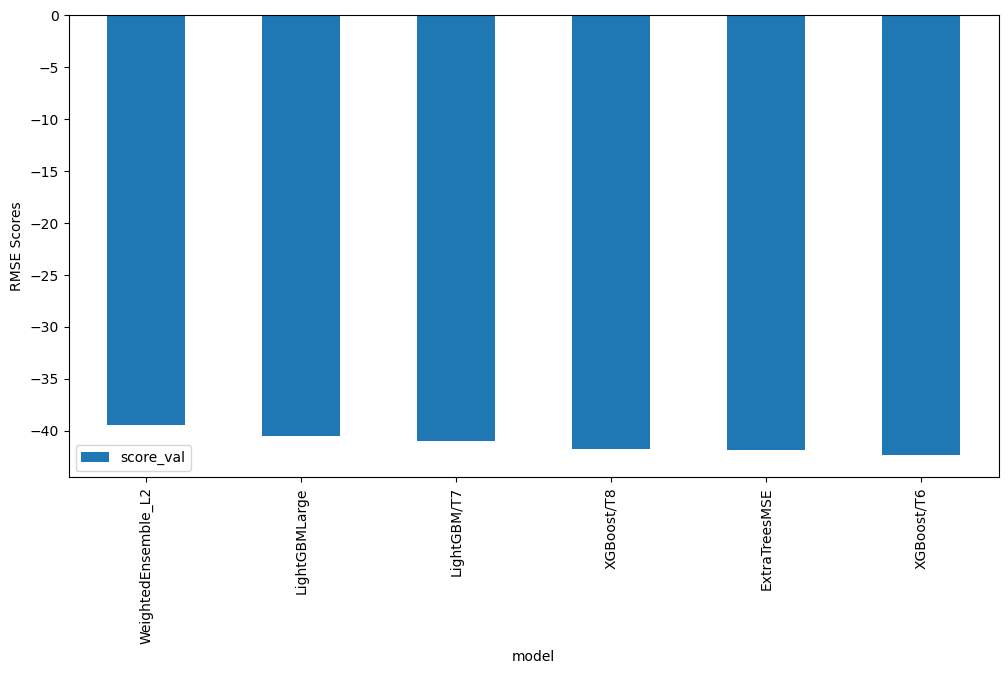

In [71]:
# Output the model's `score_val` in a bar chart to compare performance
import matplotlib.pyplot as plt
leaderboard_new_hpo2_df.plot(kind="bar", x="model", y="score_val", figsize=(12, 6))
plt.ylabel("RMSE Scores")
plt.show()

In [72]:
predictions_new_hpo2 = predictor_new_hpo2.predict(test)
predictions_new_hpo2.head()

0    16.106411
1     2.434347
2    -0.079494
3     0.380687
4     0.378874
Name: count, dtype: float32

In [73]:
# Describe the `predictions_new_hpo2` series to see if there are any negative values
predictions_new_hpo2.describe()

count    6493.000000
mean      192.092560
std       172.599304
min       -18.583332
25%        49.451447
50%       151.593689
75%       288.067017
max       880.087036
Name: count, dtype: float64

**Observations:**
* Since the minimum value in predictions series is `(-26.58)`, we do have *negative values* in the predictions.

In [74]:
# How many negative values do we have?
negative_count = predictions_new_hpo2[predictions_new_hpo2<0]
print("Total negative prediction values :", negative_count)

Total negative prediction values : 2       -0.079494
26      -3.442413
27      -5.297471
52      -1.116059
54      -3.422338
          ...    
5192    -0.074540
5336    -0.930680
6115   -12.007133
6116   -10.097563
6235    -0.812234
Name: count, Length: 64, dtype: float32


In [75]:
# Set them to zero
negative_count = predictions_new_hpo2[predictions_new_hpo2<0] = 0
print(f"No. of negative predictions: {negative_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [76]:
# Same thing as train and test dataset
submission_new_hpo2 = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo2.head()

datetime  count
0 2011-01-20 00:00:00      0
1 2011-01-20 01:00:00      0
2 2011-01-20 02:00:00      0
3 2011-01-20 03:00:00      0
4 2011-01-20 04:00:00      0

In [77]:
# Same submitting predictions
submission_new_hpo2["count"] = predictions_new_hpo2
submission_new_hpo2.to_csv("submission_new_hpo2.csv", index=False)

In [78]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo2.csv -m "new features with hyperparameters 2"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 309kB/s]
Successfully submitted to Bike Sharing Demand

In [79]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 7

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo2.csv      2023-08-07 15:55:45  new features with hyperparameters 2  complete  0.52069      0.52069       
submission_new_hpo.csv       2023-08-07 15:50:42  new features with hyperparameters    complete  0.53552      0.53552       
submission_new_hpo.csv       2023-08-07 15:44:50  new features with hyperparameters    complete  0.53552      0.53552       
submission_new_features.csv  2023-08-07 15:36:58  new features                         complete  0.45750      0.45750       
submission.csv               2023-08-07 15:24:40  first raw submission2                complete  1.80023      1.80023       


#### New Score of `0.53594`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

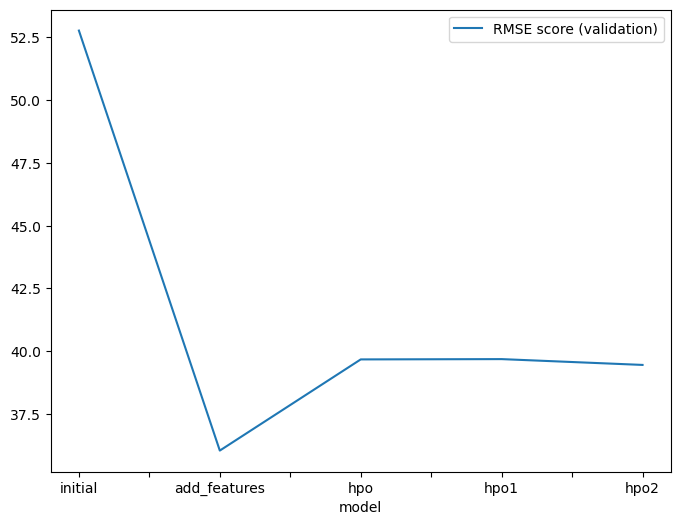

In [83]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo", "hpo1", "hpo2"], 
        "RMSE score (validation)": [52.756141, 36.051976, 39.677927, 39.689750, 39.458686]  # Note: Actual RMSE values are considered
    }
).plot(x="model", y="RMSE score (validation)", figsize=(8, 6)).get_figure()
fig.savefig('img/model_train_score.png')

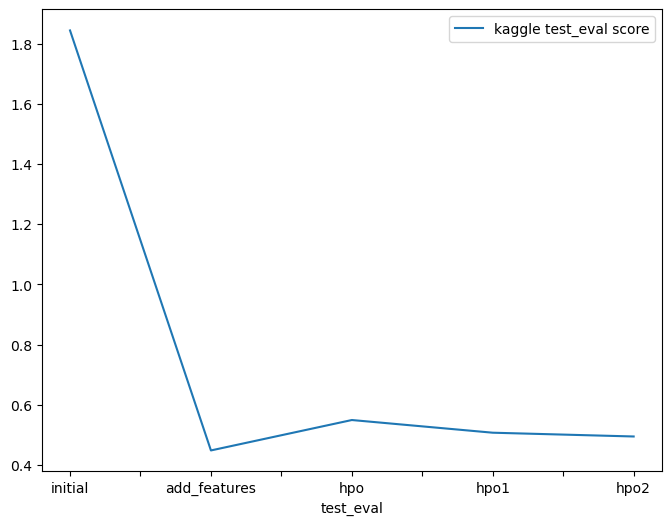

In [81]:
# Take the 3 kaggle scores (or more) and create a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo", "hpo1", "hpo2"],  
        "kaggle test_eval score": [1.80023, 0.45750, 0.54914, 0.50695, 0.49440]
    }
).plot(x="test_eval", y="kaggle test_eval score", figsize=(8, 6)).get_figure()
fig.savefig('img/model_test_score.png')

### Hyperparameter table

In [2]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo (top-hpo-model: hpo2)"],
    "hpo1": ["prescribed_values", "prescribed_values", "Tree-Based Models: (GBM, XT, XGB & RF)"],
    "hpo2": ["prescribed_values", "prescribed_values", "KNN"],
    "hpo3": ["presets: 'high quality' (auto_stack=True)", "presets: 'high quality' (auto_stack=True)", "presets: 'optimize_for_deployment"],
    "score": [1.80023, 0.45750, 0.49440]
})

model                                    hpo1  \
0                    initial                       prescribed_values   
1               add_features                       prescribed_values   
2  hpo (top-hpo-model: hpo2)  Tree-Based Models: (GBM, XT, XGB & RF)   

                hpo2                                       hpo3    score  
0  prescribed_values  presets: 'high quality' (auto_stack=True)  1.80023  
1  prescribed_values  presets: 'high quality' (auto_stack=True)  0.45750  
2                KNN          presets: 'optimize_for_deployment  0.49440